# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

'''
Import note: The classroom currently uses sklearn version 0.19.
If you need to use an imputer, it is available in sklearn.preprocessing.Imputer,
instead of sklearn.impute as in newer versions of sklearn.
'''

'\nImport note: The classroom currently uses sklearn version 0.19.\nIf you need to use an imputer, it is available in sklearn.preprocessing.Imputer,\ninstead of sklearn.impute as in newer versions of sklearn.\n'

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [2]:
# Load in the general demographics data.
azdias = pd.read_csv("Udacity_AZDIAS_Subset.csv", sep=";")

# Load in the feature summary file.
feat_info = pd.read_csv("AZDIAS_Feature_Summary.csv", sep=";")

In [3]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

print("---- azdias head:")
display(azdias.head(n=20))

---- azdias head:


AGER_TYP  ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  FINANZ_MINIMALIST  FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  FINANZ_UNAUFFAELLIGER  FINANZ_HAUSBAUER  FINANZTYP  GEBURTSJAHR  GFK_URLAUBERTYP  GREEN_AVANTGARDE  HEALTH_TYP  LP_LEBENSPHASE_FEIN  LP_LEBENSPHASE_GROB  LP_FAMILIE_FEIN  LP_FAMILIE_GROB  LP_STATUS_FEIN  LP_STATUS_GROB  NATIONALITAET_KZ  PRAEGENDE_JUGENDJAHRE  RETOURTYP_BK_S  SEMIO_SOZ  SEMIO_FAM  SEMIO_REL  SEMIO_MAT  SEMIO_VERT  SEMIO_LUST  SEMIO_ERL  SEMIO_KULT  SEMIO_RAT  SEMIO_KRIT  SEMIO_DOM  SEMIO_KAEM  SEMIO_PFLICHT  SEMIO_TRADV  SHOPPER_TYP  SOHO_KZ  TITEL_KZ  VERS_TYP  ZABEOTYP  ALTER_HH  ANZ_PERSONEN  ANZ_TITEL  HH_EINKOMMEN_SCORE  KK_KUNDENTYP  W_KEIT_KIND_HH  WOHNDAUER_2008  ANZ_HAUSHALTE_AKTIV  ANZ_HH_TITEL  GEBAEUDETYP  KONSUMNAEHE  MIN_GEBAEUDEJAHR OST_WEST_KZ  WOHNLAGE CAMEO_DEUG_2015 CAMEO_DEU_2015 CAMEO_INTL_2015  KBA05_ANTG1  KBA05_ANTG2  KBA05_ANTG3  KBA05_ANTG4  KBA05_BAUMAX  KBA05_GBZ  BALLRAUM  EWDICHTE  INNENSTADT  GEBAEUDETYP_RASTER  KKK  MOBI_REGIO  ONLINE_AFFINITAET  REGIOTYP  KBA13_ANZAHL_PKW  PLZ8_ANTG1  PLZ8_ANTG2  PLZ8_ANTG3  PLZ8_ANTG4  PLZ8_BAUMAX  PLZ8_HHZ  PLZ8_GBZ  ARBEIT  ORTSGR_KLS9  RELAT_AB
0         -1                     2          1            2.0                  3              4                 3               5                      5                 3          4            0             10.0                 0          -1                 15.0                  4.0              2.0              2.0             1.0             1.0                 0                      0             5.0          2          6          7          5           1           5          3           3          4           7          6           6              5            3           -1      NaN       NaN        -1         3       NaN           NaN        NaN                 2.0           NaN             NaN             NaN                  NaN           NaN          NaN          NaN               NaN         NaN       NaN             NaN            NaN             NaN          NaN          NaN          NaN          NaN           NaN        NaN       NaN       NaN         NaN                 NaN  NaN         NaN                1.0       NaN               NaN         NaN         NaN         NaN         NaN          NaN       NaN       NaN     NaN          NaN       NaN
1         -1                     1          2            5.0                  1              5                 2               5                      4                 5          1         1996             10.0                 0           3                 21.0                  6.0              5.0              3.0             2.0             1.0                 1                     14             1.0          5          4          4          3           1           2          2           3          6           4          7           4              7            6            3      1.0       0.0         2         5       0.0           2.0        0.0                 6.0           NaN             3.0             9.0                 11.0           0.0          8.0          1.0            1992.0           W       4.0               8             8A              51          0.0          0.0          0.0          2.0           5.0        1.0       6.0       3.0         8.0                 3.0  2.0         1.0                3.0       3.0             963.0         2.0         3.0         2.0         1.0          1.0       5.0       4.0     3.0          5.0       4.0
2         -1                     3          2            3.0                  1              4                 1               2                      3                 5          1         1979             10.0                 1           3                  3.0                  1.0              1.0              1.0             3.0             2.0                 1                     15             3.0          4          1          3          3           4           4

In [5]:
print("---- azdias describe:")
display(azdias.describe())

---- azdias describe:


AGER_TYP  ALTERSKATEGORIE_GROB      ANREDE_KZ  CJT_GESAMTTYP  FINANZ_MINIMALIST  FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  FINANZ_UNAUFFAELLIGER  FINANZ_HAUSBAUER      FINANZTYP    GEBURTSJAHR  GFK_URLAUBERTYP  GREEN_AVANTGARDE     HEALTH_TYP  LP_LEBENSPHASE_FEIN  LP_LEBENSPHASE_GROB  LP_FAMILIE_FEIN  LP_FAMILIE_GROB  LP_STATUS_FEIN  LP_STATUS_GROB  NATIONALITAET_KZ  PRAEGENDE_JUGENDJAHRE  RETOURTYP_BK_S      SEMIO_SOZ      SEMIO_FAM      SEMIO_REL      SEMIO_MAT     SEMIO_VERT     SEMIO_LUST      SEMIO_ERL     SEMIO_KULT      SEMIO_RAT     SEMIO_KRIT      SEMIO_DOM     SEMIO_KAEM  SEMIO_PFLICHT    SEMIO_TRADV    SHOPPER_TYP        SOHO_KZ       TITEL_KZ       VERS_TYP       ZABEOTYP       ALTER_HH   ANZ_PERSONEN      ANZ_TITEL  HH_EINKOMMEN_SCORE   KK_KUNDENTYP  W_KEIT_KIND_HH  WOHNDAUER_2008  ANZ_HAUSHALTE_AKTIV   ANZ_HH_TITEL    GEBAEUDETYP    KONSUMNAEHE  MIN_GEBAEUDEJAHR       WOHNLAGE    KBA05_ANTG1    KBA05_ANTG2    KBA05_ANTG3    KBA05_ANTG4   KBA05_BAUMAX      KBA05_GBZ       BALLRAUM       EWDICHTE     INNENSTADT  GEBAEUDETYP_RASTER            KKK     MOBI_REGIO  ONLINE_AFFINITAET       REGIOTYP  KBA13_ANZAHL_PKW     PLZ8_ANTG1     PLZ8_ANTG2     PLZ8_ANTG3     PLZ8_ANTG4    PLZ8_BAUMAX       PLZ8_HHZ       PLZ8_GBZ         ARBEIT    ORTSGR_KLS9      RELAT_AB
count  891221.000000         891221.000000  891221.000000  886367.000000      891221.000000  891221.000000     891221.000000   891221.000000          891221.000000     891221.000000  891221.000000  891221.000000    886367.000000     891221.000000  891221.000000        886367.000000        886367.000000    886367.000000    886367.000000   886367.000000   886367.000000     891221.000000          891221.000000   886367.000000  891221.000000  891221.000000  891221.000000  891221.000000  891221.000000  891221.000000  891221.000000  891221.000000  891221.000000  891221.000000  891221.000000  891221.000000  891221.000000  891221.000000  891221.000000  817722.000000  817722.000000  891221.000000  891221.000000  817722.000000  817722.000000  817722.000000       872873.000000  306609.000000   783619.000000   817722.000000        798073.000000  794213.000000  798073.000000  817252.000000     798073.000000  798073.000000  757897.000000  757897.000000  757897.000000  757897.000000  757897.000000  757897.000000  797481.000000  797481.000000  797481.000000       798066.000000  770025.000000  757897.000000      886367.000000  770025.000000     785421.000000  774706.000000  774706.000000  774706.000000  774706.000000  774706.000000  774706.000000  774706.000000  794005.000000  794005.000000  794005.00000
mean       -0.358435              2.777398       1.522098       3.632838           3.074528       2.821039          3.401106        3.033328               2.874167          3.075121       3.790586    1101.178533         7.350304          0.196612       1.792102            14.622637             4.453621         3.599574         2.185966        4.791151        2.432575          1.026827               8.154346        3.419630       3.945860       4.272729       4.240609       4.001597       4.023709       4.359086       4.481405       4.025014       3.910139       4.763223       4.667550       4.445007       4.256076       3.661784       1.266967       0.008423       0.003483       1.197852       3.362438      10.864126       1.727637       0.004162            4.207243       3.410640        3.933406        7.908791             8.287263       0.040647       2.798641       3.018452       1993.277011       4.052836       1.494277       1.265584       0.624525       0.305927       1.389552       3.158580       4.153043       3.939172       4.549491            3.738306       2.592991       2.963540           2.698691       4.257967        619.701439       2.253330       2.801858       1.595426       0.699166       1.943913       3.612821       3.381087       3.167854       5.293002       3.07222
std         1.198724              1.068775       0.499512       1.595021           1.

In [6]:
print("---- feat_info head:")
display(feat_info.head(n=5))

---- feat_info head:


attribute information_level         type missing_or_unknown
0              AGER_TYP            person  categorical             [-1,0]
1  ALTERSKATEGORIE_GROB            person      ordinal           [-1,0,9]
2             ANREDE_KZ            person  categorical             [-1,0]
3         CJT_GESAMTTYP            person  categorical                [0]
4     FINANZ_MINIMALIST            person      ordinal               [-1]

In [7]:
print("---- feat_info info:")
#display(feat_info.info())

---- feat_info info:


In [8]:
print("---- feat_info describe:")
display(feat_info.describe())

---- feat_info describe:


attribute information_level     type missing_or_unknown
count                   85                85       85                 85
unique                  85                 9        5                  9
top     GEBAEUDETYP_RASTER            person  ordinal               [-1]
freq                     1                43       49                 26

> **Tip**: Add additional cells to keep everything in reasonably-sized chunks! Keyboard shortcut `esc --> a` (press escape to enter command mode, then press the 'A' key) adds a new cell before the active cell, and `esc --> b` adds a new cell after the active cell. If you need to convert an active cell to a markdown cell, use `esc --> m` and to convert to a code cell, use `esc --> y`. 

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

In [9]:
# Identify missing or unknown data values ...

def determine_item_types(series):
    item_types = {}
    for index, item in series.items():
        item_type = type(item)
        item_types[index] = item_type
        print(f"Index {index}: Value {item} is of type {item_type}")
    return item_types
   

def unify_null_values(attrib_name, df):
    attrib_spec = feat_info[feat_info['attribute'] == attrib_name]
    null_values = attrib_spec['missing_or_unknown']
       
    if attrib_name in ["GEBURTSJAHR", "LP_LEBENSPHASE_FEIN", "LP_LEBENSPHASE_GROB","LP_FAMILIE_FEIN", "LP_FAMILIE_GROB", "ALTER_HH", "ANZ_HAUSHALTE_AKTIV"]:
        specific_value = 0
        df[attrib_name].replace(to_replace=specific_value, value=np.nan, inplace=True)
    elif attrib_name in ["HEALTH_TYP","NATIONALITAET_KZ", "PRAEGENDE_JUGENDJAHRE", "KKK", "REGIOTYP", "ORTSGR_KLS9", "W_KEIT_KIND_HH"]:
        specific_values = [-1,0]
        df[attrib_name].replace(to_replace=specific_values, value=np.nan, inplace=True)
    elif attrib_name in ["AGER_TYP", "TITEL_KZ", "SHOPPER_TYP", "VERS_TYP"]:
        specific_value = -1
        df[attrib_name].replace(to_replace=specific_value, value=np.nan, inplace=True)
    elif attrib_name in["CAMEO_INTL_2015"]:
        specific_value = "XX"
        df[attrib_name].replace(to_replace=specific_value, value=np.nan, inplace=True)
    else: 
        df[attrib_name].replace(to_replace=null_values, value=np.nan, inplace=True)
    
for col_name, col_data in azdias.iteritems():
    unify_null_values(col_name, azdias)
    
print("finished")


finished


#### Remarks
Attribute "AGER_TYP": 
Decided to accept "0 - no classification possible" an non null-value, since I assume, that this is a sensible value, if the person is not yet "elderly". Normally I would check this with an analyst or business owner.

Attribute "TITEL_KZ":
Decided to accept "0 - unknown", as non null-value, since I cannot assume that all people do have an academic title. As above I would normally check this with an analyst or business owner.

In [10]:
#...  and convert them to NaN.
def count_null_values(azdias):
    
    null_value_count_azdias = azdias.isnull().sum()

    print("\nnull value count per column of azidas:")
    print(null_value_count_azdias)
    return null_value_count_azdias
    
null_value_count_azdias = count_null_values(azdias)

print("\nfinished null_value_count_azdias")


null value count per column of azidas:
AGER_TYP                 677503
ALTERSKATEGORIE_GROB          0
ANREDE_KZ                     0
CJT_GESAMTTYP              4854
FINANZ_MINIMALIST             0
FINANZ_SPARER                 0
FINANZ_VORSORGER              0
FINANZ_ANLEGER                0
FINANZ_UNAUFFAELLIGER         0
FINANZ_HAUSBAUER              0
FINANZTYP                     0
GEBURTSJAHR              392318
GFK_URLAUBERTYP            4854
GREEN_AVANTGARDE              0
HEALTH_TYP               111196
LP_LEBENSPHASE_FEIN       97632
LP_LEBENSPHASE_GROB       94572
LP_FAMILIE_FEIN           77792
LP_FAMILIE_GROB           77792
LP_STATUS_FEIN             4854
LP_STATUS_GROB             4854
NATIONALITAET_KZ         108315
PRAEGENDE_JUGENDJAHRE    108164
RETOURTYP_BK_S             4854
SEMIO_SOZ                     0
SEMIO_FAM                     0
SEMIO_REL                     0
SEMIO_MAT                     0
SEMIO_VERT                    0
SEMIO_LUST                    0


#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

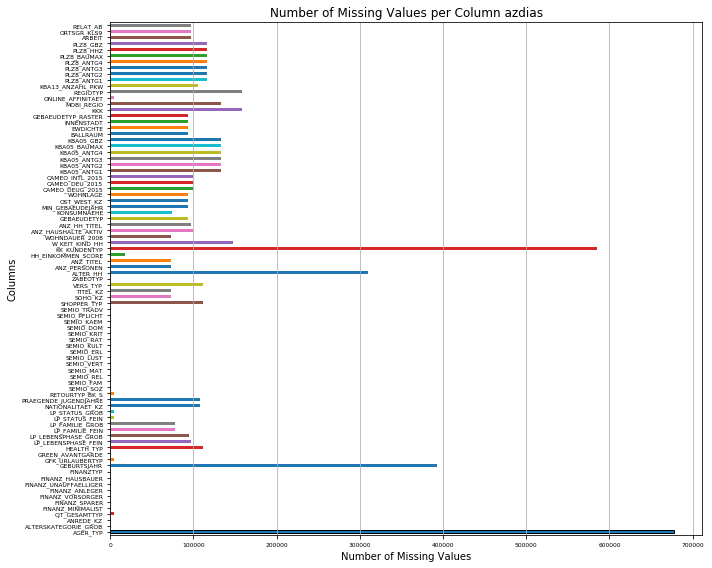

In [11]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.
def plot_missing_data(null_value_count_azdias):
    plt.figure(figsize=(10, 8))
    null_value_count_azdias.plot(kind='barh', edgecolor='k')
    plt.title('Number of Missing Values per Column azdias')
    plt.xlabel('Number of Missing Values')
    plt.ylabel('Columns')
    plt.grid(axis='x')
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)
    plt.tight_layout()
    plt.show()

plot_missing_data(null_value_count_azdias)

In [12]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)
def check_and_drop_column(df, column_name_list):
    columns_to_drop = []
    for column_name in column_name_list:
        if column_name in df.columns:
            columns_to_drop.append(column_name)
    
    print(len(columns_to_drop))
    if len(columns_to_drop) > 0:
            df.drop(columns=columns_to_remove, inplace=True)

columns_to_remove = ['AGER_TYP','KK_KUNDENTYP', 'GEBURTSJAHR', 'ALTER_HH']

check_and_drop_column(azdias, columns_to_remove)

null_value_count_azdias_cleaned = count_null_values(azdias)

4

null value count per column of azidas:
ALTERSKATEGORIE_GROB          0
ANREDE_KZ                     0
CJT_GESAMTTYP              4854
FINANZ_MINIMALIST             0
FINANZ_SPARER                 0
FINANZ_VORSORGER              0
FINANZ_ANLEGER                0
FINANZ_UNAUFFAELLIGER         0
FINANZ_HAUSBAUER              0
FINANZTYP                     0
GFK_URLAUBERTYP            4854
GREEN_AVANTGARDE              0
HEALTH_TYP               111196
LP_LEBENSPHASE_FEIN       97632
LP_LEBENSPHASE_GROB       94572
LP_FAMILIE_FEIN           77792
LP_FAMILIE_GROB           77792
LP_STATUS_FEIN             4854
LP_STATUS_GROB             4854
NATIONALITAET_KZ         108315
PRAEGENDE_JUGENDJAHRE    108164
RETOURTYP_BK_S             4854
SEMIO_SOZ                     0
SEMIO_FAM                     0
SEMIO_REL                     0
SEMIO_MAT                     0
SEMIO_VERT                    0
SEMIO_LUST                    0
SEMIO_ERL                     0
SEMIO_KULT                    

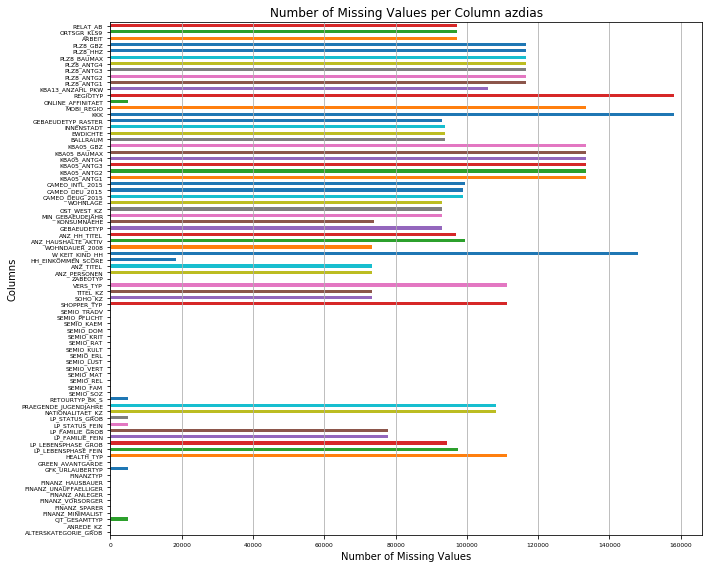

In [13]:
plot_missing_data(null_value_count_azdias_cleaned)

In [14]:
#Investigate patterns in the amount of missing data in each column.
column_index = 0
null_value_count_df = null_value_count_azdias_cleaned.to_frame()
azdias_null_value_count_sorted = null_value_count_df.sort_values(by=null_value_count_df.columns[column_index])
null_values_grouped_df = azdias_null_value_count_sorted.groupby(azdias_null_value_count_sorted.columns[column_index])

print("\nattributes grouped by number of null values:")
sorted_groups = sorted(null_values_grouped_df, key=lambda x: len(x[1]), reverse=True)
for name, group in sorted_groups:
    index_value = int(name)
    if index_value > 0 and len(group) > 1:
        print(f"\nGroup: {name}")
        print(group)  


attributes grouped by number of null values:

Group: 116515
                  0
PLZ8_HHZ     116515
PLZ8_ANTG1   116515
PLZ8_ANTG2   116515
PLZ8_ANTG3   116515
PLZ8_ANTG4   116515
PLZ8_BAUMAX  116515
PLZ8_GBZ     116515

Group: 133324
                   0
KBA05_BAUMAX  133324
KBA05_ANTG4   133324
MOBI_REGIO    133324
KBA05_ANTG3   133324
KBA05_ANTG2   133324
KBA05_ANTG1   133324
KBA05_GBZ     133324

Group: 4854
                      0
GFK_URLAUBERTYP    4854
RETOURTYP_BK_S     4854
ONLINE_AFFINITAET  4854
LP_STATUS_GROB     4854
LP_STATUS_FEIN     4854
CJT_GESAMTTYP      4854

Group: 73499
                    0
TITEL_KZ        73499
WOHNDAUER_2008  73499
SOHO_KZ         73499
ANZ_TITEL       73499
ANZ_PERSONEN    73499

Group: 93148
                      0
MIN_GEBAEUDEJAHR  93148
OST_WEST_KZ       93148
WOHNLAGE          93148
GEBAEUDETYP       93148

Group: 93740
                0
BALLRAUM    93740
INNENSTADT  93740
EWDICHTE    93740

Group: 111196
                  0
VERS_TYP     1

#### Discussion 1.1.2: Assess Missing Data in Each Column
I decided to exclude four outliers: 
- AGER_TYP (best-ager typology)
Over 75 percent of the data records do not contain a value for the attribute AGER_TYPE
- KK_KUNDENTYP (consumer pattern over past 12 months)
Only roughly one third of the records do contain a non-null value for this attribute. I will exclude this column from the data set. 
- GEBURTSJAHR (year of birth)
More than 50 percent of the data contains no year of birth, therefore I exclude this attribute as well.
- ALTER_HH (birthdate of head of household)
One third of the data does not contain the birthdate of the head of the household.

For all other attributes the amount of null-values is less than 20 percent of the total number of records. 
If these attributes are grouped by the number of their null-values over all records, it becomes clear that there are dependencies between attributes. The cause is probably inhomogenious data collection or different data sources.

#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

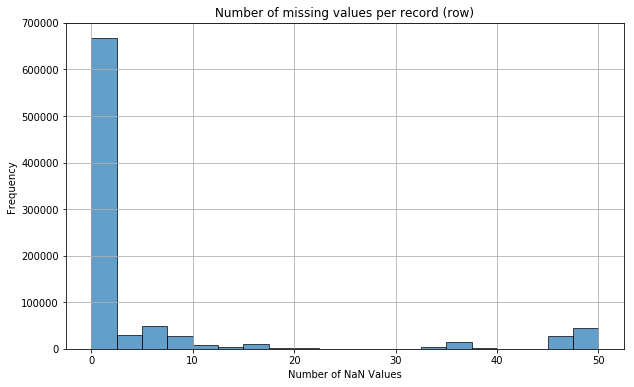

In [15]:
# How much data is missing in each row of the dataset?
def plot_null_values_per_row(null_values_per_row):
    plt.figure(figsize=(10, 6))
    plt.hist(null_values_per_row, bins=20, edgecolor='k', alpha=0.7)
    plt.title('Number of missing values per record (row)')
    plt.xlabel('Number of NaN Values')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

null_values_per_row_azdias = azdias.isnull().sum(axis=1)
plot_null_values_per_row(null_values_per_row_azdias)


Records with maximum 5 missing values


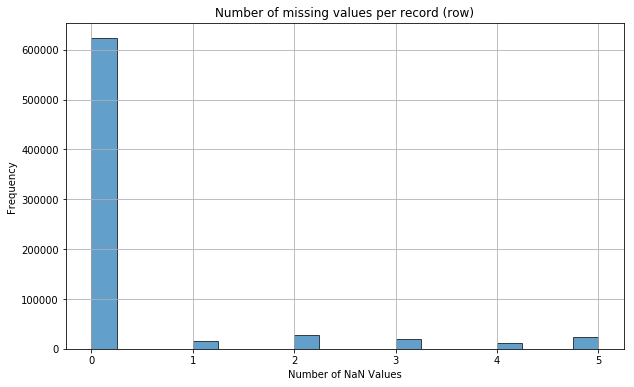


Records with more than 5 missing values


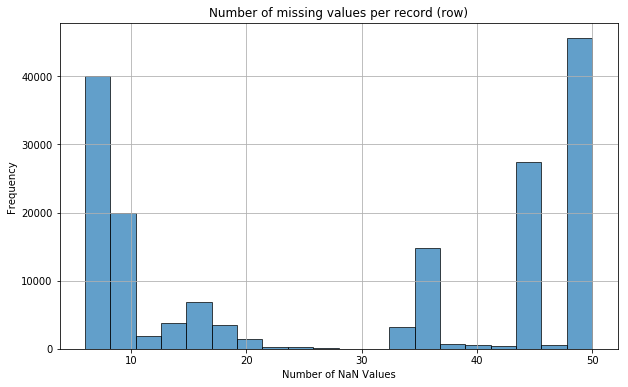

In [16]:
# Write code to divide the data into two subsets based on the number of missing
# values in each row.

threshold = 5 # number of missing values
azdias_sub_1 = azdias[null_values_per_row_azdias <= threshold]
azdias_sub_2 = azdias[null_values_per_row_azdias > threshold]

print("\nRecords with maximum 5 missing values")
null_values_per_row_sub_1 = azdias_sub_1.isnull().sum(axis=1)
plot_null_values_per_row(null_values_per_row_sub_1)

print("\nRecords with more than 5 missing values")
null_values_per_row_sub_2 = azdias_sub_2.isnull().sum(axis=1)
plot_null_values_per_row(null_values_per_row_sub_2)


In [17]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.

print("\nHead azdias_sub_1 (maximum 5 missing values)")
display(azdias_sub_1.head(5))

print("\nHead azdias_sub_2 (more than 5 missing values)")
display(azdias_sub_2.head(5))


Head azdias_sub_1 (maximum 5 missing values)


ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  FINANZ_MINIMALIST  FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  FINANZ_UNAUFFAELLIGER  FINANZ_HAUSBAUER  FINANZTYP  GFK_URLAUBERTYP  GREEN_AVANTGARDE  HEALTH_TYP  LP_LEBENSPHASE_FEIN  LP_LEBENSPHASE_GROB  LP_FAMILIE_FEIN  LP_FAMILIE_GROB  LP_STATUS_FEIN  LP_STATUS_GROB  NATIONALITAET_KZ  PRAEGENDE_JUGENDJAHRE  RETOURTYP_BK_S  SEMIO_SOZ  SEMIO_FAM  SEMIO_REL  SEMIO_MAT  SEMIO_VERT  SEMIO_LUST  SEMIO_ERL  SEMIO_KULT  SEMIO_RAT  SEMIO_KRIT  SEMIO_DOM  SEMIO_KAEM  SEMIO_PFLICHT  SEMIO_TRADV  SHOPPER_TYP  SOHO_KZ  TITEL_KZ  VERS_TYP  ZABEOTYP  ANZ_PERSONEN  ANZ_TITEL  HH_EINKOMMEN_SCORE  W_KEIT_KIND_HH  WOHNDAUER_2008  ANZ_HAUSHALTE_AKTIV  ANZ_HH_TITEL  GEBAEUDETYP  KONSUMNAEHE  MIN_GEBAEUDEJAHR OST_WEST_KZ  WOHNLAGE CAMEO_DEUG_2015 CAMEO_DEU_2015 CAMEO_INTL_2015  KBA05_ANTG1  KBA05_ANTG2  KBA05_ANTG3  KBA05_ANTG4  KBA05_BAUMAX  KBA05_GBZ  BALLRAUM  EWDICHTE  INNENSTADT  GEBAEUDETYP_RASTER  KKK  MOBI_REGIO  ONLINE_AFFINITAET  REGIOTYP  KBA13_ANZAHL_PKW  PLZ8_ANTG1  PLZ8_ANTG2  PLZ8_ANTG3  PLZ8_ANTG4  PLZ8_BAUMAX  PLZ8_HHZ  PLZ8_GBZ  ARBEIT  ORTSGR_KLS9  RELAT_AB
1                     1          2            5.0                  1              5                 2               5                      4                 5          1             10.0                 0         3.0                 21.0                  6.0              5.0              3.0             2.0             1.0               1.0                   14.0             1.0          5          4          4          3           1           2          2           3          6           4          7           4              7            6          3.0      1.0       0.0       2.0         5           2.0        0.0                 6.0             3.0             9.0                 11.0           0.0          8.0          1.0            1992.0           W       4.0               8             8A              51          0.0          0.0          0.0          2.0           5.0        1.0       6.0       3.0         8.0                 3.0  2.0         1.0                3.0       3.0             963.0         2.0         3.0         2.0         1.0          1.0       5.0       4.0     3.0          5.0       4.0
2                     3          2            3.0                  1              4                 1               2                      3                 5          1             10.0                 1         3.0                  3.0                  1.0              1.0              1.0             3.0             2.0               1.0                   15.0             3.0          4          1          3          3           4           4          6           3          4           7          7           7              3            3          2.0      0.0       0.0       1.0         5           1.0        0.0                 4.0             3.0             9.0                 10.0           0.0          1.0          5.0            1992.0           W       2.0               4             4C              24          1.0          3.0          1.0          0.0           0.0        3.0       2.0       4.0         4.0                 4.0  2.0         3.0                2.0       2.0             712.0         3.0         3.0         1.0         0.0          1.0       4.0       4.0     3.0          5.0       2.0
4                     3          1            5.0                  4              3                 4               1                      3                 2          5              5.0                 0         3.0                 32.0                 10.0             10.0              5.0             3.0             2.0               1.0                    8.0             5.0          6          4          4          2           7           4          4           6          2           3          2           2              4            2          2.0      0.0       0.0       2.0         4           4.0    


Head azdias_sub_2 (more than 5 missing values)


ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  FINANZ_MINIMALIST  FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  FINANZ_UNAUFFAELLIGER  FINANZ_HAUSBAUER  FINANZTYP  GFK_URLAUBERTYP  GREEN_AVANTGARDE  HEALTH_TYP  LP_LEBENSPHASE_FEIN  LP_LEBENSPHASE_GROB  LP_FAMILIE_FEIN  LP_FAMILIE_GROB  LP_STATUS_FEIN  LP_STATUS_GROB  NATIONALITAET_KZ  PRAEGENDE_JUGENDJAHRE  RETOURTYP_BK_S  SEMIO_SOZ  SEMIO_FAM  SEMIO_REL  SEMIO_MAT  SEMIO_VERT  SEMIO_LUST  SEMIO_ERL  SEMIO_KULT  SEMIO_RAT  SEMIO_KRIT  SEMIO_DOM  SEMIO_KAEM  SEMIO_PFLICHT  SEMIO_TRADV  SHOPPER_TYP  SOHO_KZ  TITEL_KZ  VERS_TYP  ZABEOTYP  ANZ_PERSONEN  ANZ_TITEL  HH_EINKOMMEN_SCORE  W_KEIT_KIND_HH  WOHNDAUER_2008  ANZ_HAUSHALTE_AKTIV  ANZ_HH_TITEL  GEBAEUDETYP  KONSUMNAEHE  MIN_GEBAEUDEJAHR OST_WEST_KZ  WOHNLAGE CAMEO_DEUG_2015 CAMEO_DEU_2015 CAMEO_INTL_2015  KBA05_ANTG1  KBA05_ANTG2  KBA05_ANTG3  KBA05_ANTG4  KBA05_BAUMAX  KBA05_GBZ  BALLRAUM  EWDICHTE  INNENSTADT  GEBAEUDETYP_RASTER  KKK  MOBI_REGIO  ONLINE_AFFINITAET  REGIOTYP  KBA13_ANZAHL_PKW  PLZ8_ANTG1  PLZ8_ANTG2  PLZ8_ANTG3  PLZ8_ANTG4  PLZ8_BAUMAX  PLZ8_HHZ  PLZ8_GBZ  ARBEIT  ORTSGR_KLS9  RELAT_AB
0                      2          1            2.0                  3              4                 3               5                      5                 3          4             10.0                 0         NaN                 15.0                  4.0              2.0              2.0             1.0             1.0               NaN                    NaN             5.0          2          6          7          5           1           5          3           3          4           7          6           6              5            3          NaN      NaN       NaN       NaN         3           NaN        NaN                 2.0             NaN             NaN                  NaN           NaN          NaN          NaN               NaN         NaN       NaN             NaN            NaN             NaN          NaN          NaN          NaN          NaN           NaN        NaN       NaN       NaN         NaN                 NaN  NaN         NaN                1.0       NaN               NaN         NaN         NaN         NaN         NaN          NaN       NaN       NaN     NaN          NaN       NaN
3                      4          2            2.0                  4              2                 5               2                      1                 2          6              1.0                 0         2.0                  NaN                  NaN              NaN              NaN             9.0             4.0               1.0                    8.0             2.0          5          1          2          1           4           4          7           4          3           4          4           5              4            4          1.0      0.0       0.0       1.0         3           0.0        0.0                 1.0             NaN             9.0                  1.0           0.0          1.0          4.0            1997.0           W       7.0               2             2A              12          4.0          1.0          0.0          0.0           1.0        4.0       4.0       2.0         6.0                 4.0  NaN         4.0                1.0       NaN             596.0         2.0         2.0         2.0         0.0          1.0       3.0       4.0     2.0          3.0       3.0
11                     2          1            6.0                  3              4                 3               5                      5                 3          4              5.0                 0         NaN                  NaN                  NaN              NaN              NaN             5.0             2.0               NaN                    NaN             3.0          2          6          7          5           1           5          3           3          4           7          6           6              5            3          NaN      NaN       NaN       NaN         3           NaN 

In [18]:
azdias_sub_3 = azdias_sub_2[null_values_per_row_azdias > 30]
print("\nHead azdias_sub_3 - more than 30 missing values")
display(azdias_sub_3.head(20))


Head azdias_sub_3 - more than 30 missing values


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  FINANZ_MINIMALIST  FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  FINANZ_UNAUFFAELLIGER  FINANZ_HAUSBAUER  FINANZTYP  GFK_URLAUBERTYP  GREEN_AVANTGARDE  HEALTH_TYP  LP_LEBENSPHASE_FEIN  LP_LEBENSPHASE_GROB  LP_FAMILIE_FEIN  LP_FAMILIE_GROB  LP_STATUS_FEIN  LP_STATUS_GROB  NATIONALITAET_KZ  PRAEGENDE_JUGENDJAHRE  RETOURTYP_BK_S  SEMIO_SOZ  SEMIO_FAM  SEMIO_REL  SEMIO_MAT  SEMIO_VERT  SEMIO_LUST  SEMIO_ERL  SEMIO_KULT  SEMIO_RAT  SEMIO_KRIT  SEMIO_DOM  SEMIO_KAEM  SEMIO_PFLICHT  SEMIO_TRADV  SHOPPER_TYP  SOHO_KZ  TITEL_KZ  VERS_TYP  ZABEOTYP  ANZ_PERSONEN  ANZ_TITEL  HH_EINKOMMEN_SCORE  W_KEIT_KIND_HH  WOHNDAUER_2008  ANZ_HAUSHALTE_AKTIV  ANZ_HH_TITEL  GEBAEUDETYP  KONSUMNAEHE  MIN_GEBAEUDEJAHR OST_WEST_KZ  WOHNLAGE CAMEO_DEUG_2015 CAMEO_DEU_2015 CAMEO_INTL_2015  KBA05_ANTG1  KBA05_ANTG2  KBA05_ANTG3  KBA05_ANTG4  KBA05_BAUMAX  KBA05_GBZ  BALLRAUM  EWDICHTE  INNENSTADT  GEBAEUDETYP_RASTER  KKK  MOBI_REGIO  ONLINE_AFFINITAET  REGIOTYP  KBA13_ANZAHL_PKW  PLZ8_ANTG1  PLZ8_ANTG2  PLZ8_ANTG3  PLZ8_ANTG4  PLZ8_BAUMAX  PLZ8_HHZ  PLZ8_GBZ  ARBEIT  ORTSGR_KLS9  RELAT_AB
0                      2          1            2.0                  3              4                 3               5                      5                 3          4             10.0                 0         NaN                 15.0                  4.0              2.0              2.0             1.0             1.0               NaN                    NaN             5.0          2          6          7          5           1           5          3           3          4           7          6           6              5            3          NaN      NaN       NaN       NaN         3           NaN        NaN                 2.0             NaN             NaN                  NaN           NaN          NaN          NaN               NaN         NaN       NaN             NaN            NaN             NaN          NaN          NaN          NaN          NaN           NaN        NaN       NaN       NaN         NaN                 NaN  NaN         NaN                1.0       NaN               NaN         NaN         NaN         NaN         NaN          NaN       NaN       NaN     NaN          NaN       NaN
11                     2          1            6.0                  3              4                 3               5                      5                 3          4              5.0                 0         NaN                  NaN                  NaN              NaN              NaN             5.0             2.0               NaN                    NaN             3.0          2          6          7          5           1           5          3           3          4           7          6           6              5            3          NaN      NaN       NaN       NaN         3           NaN        NaN                 2.0             NaN             NaN                  NaN           NaN          NaN          NaN               NaN         NaN       NaN             NaN            NaN             NaN          NaN          NaN          NaN          NaN           NaN        NaN       NaN       NaN         NaN                 NaN  NaN         NaN                2.0       NaN               NaN         NaN         NaN         NaN         NaN          NaN       NaN       NaN     NaN          NaN       NaN
14                     3          1            6.0                  3              4                 3               5                      5                 3          4              5.0                 0         NaN                  NaN                  NaN              NaN              NaN             5.0             2.0               NaN                    NaN             3.0          2          6          7          5           1           5          3           3          4           7          6           6              5            3          NaN      NaN       NaN       NaN         3           NaN 

#### Discussion 1.1.3: Assess Missing Data in Each Row

Data records with many missing values (more than 30 null values) seem to follow the same patterns. Some data is availble for the first two feature section ("personal level features" and "houshold-level features") plus one attribute out of section "RR1 region features" (7.4 "online affinity"). Data concerning housing, neighborhood, location and infrastructure (feature sections 3 to 6, 8 and 9) seems to be missing.

I assume this bunch of data comes from a specific source or sources. Some attributes (e. g. estimated household net income, dimensions of financial typology) of theses records contain rather uniform values. Maybe the data collection was directed towards a specific group of people and most probably did not cover all data features specified for the azdias project. 

### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [19]:
# How many features are there of each data type?

data_type_counts = feat_info['type'].value_counts()
print(data_type_counts)

ordinal        49
categorical    21
numeric         7
mixed           7
interval        1
Name: type, dtype: int64


#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

In [20]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?
for column in azdias_sub_1.columns:
    attrib_spec = feat_info[feat_info['attribute'] == column]
    data_type = attrib_spec['type']
    if (data_type == 'categorical').any():
        value_range = azdias_sub_1[column].unique()
        if len(value_range) < 4:
            print(f"BINARY - Value range of attribute {column}: {value_range}")
        else:
            print(f"MULTI-LEVEL - Value range of attribute {column}: {value_range}")                       

BINARY - Value range of attribute ANREDE_KZ: [2 1]
MULTI-LEVEL - Value range of attribute CJT_GESAMTTYP: [ 5.  3.  2.  4.  1.  6.]
MULTI-LEVEL - Value range of attribute FINANZTYP: [1 5 2 4 6 3]
MULTI-LEVEL - Value range of attribute GFK_URLAUBERTYP: [ 10.   5.   1.  12.   9.   3.   8.  11.   4.   7.   2.   6.]
BINARY - Value range of attribute GREEN_AVANTGARDE: [0 1]
MULTI-LEVEL - Value range of attribute LP_FAMILIE_FEIN: [  5.   1.  10.   2.  nan   7.  11.   8.   4.   6.   9.   3.]
MULTI-LEVEL - Value range of attribute LP_FAMILIE_GROB: [  3.   1.   5.   2.  nan   4.]
MULTI-LEVEL - Value range of attribute LP_STATUS_FEIN: [  2.   3.   4.   1.  10.   8.   9.   5.   6.   7.]
MULTI-LEVEL - Value range of attribute LP_STATUS_GROB: [ 1.  2.  5.  4.  3.]
MULTI-LEVEL - Value range of attribute NATIONALITAET_KZ: [  1.   2.  nan   3.]
MULTI-LEVEL - Value range of attribute SHOPPER_TYP: [  3.   2.   0.   1.  nan]
BINARY - Value range of attribute SOHO_KZ: [ 1.  0.]
MULTI-LEVEL - Value range of

Binary:
    ANREDE_KZ
    GREEN_AVANTGAREDE
    SOHO_KZ
    VERS_TYP
    OST_WEST_KZ ==> takes non-numeric values ('W', 'O') and needs re-encoding

In [21]:
# Re-encode categorical variable(s) to be kept in the analysis.
columns_to_encode = ['OST_WEST_KZ', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015']
azdias_re_encoded = pd.get_dummies(azdias_sub_1, columns=columns_to_encode, prefix=columns_to_encode)
display(azdias_sub_1.head(5))
display(azdias_re_encoded.head(5))

ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  FINANZ_MINIMALIST  FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  FINANZ_UNAUFFAELLIGER  FINANZ_HAUSBAUER  FINANZTYP  GFK_URLAUBERTYP  GREEN_AVANTGARDE  HEALTH_TYP  LP_LEBENSPHASE_FEIN  LP_LEBENSPHASE_GROB  LP_FAMILIE_FEIN  LP_FAMILIE_GROB  LP_STATUS_FEIN  LP_STATUS_GROB  NATIONALITAET_KZ  PRAEGENDE_JUGENDJAHRE  RETOURTYP_BK_S  SEMIO_SOZ  SEMIO_FAM  SEMIO_REL  SEMIO_MAT  SEMIO_VERT  SEMIO_LUST  SEMIO_ERL  SEMIO_KULT  SEMIO_RAT  SEMIO_KRIT  SEMIO_DOM  SEMIO_KAEM  SEMIO_PFLICHT  SEMIO_TRADV  SHOPPER_TYP  SOHO_KZ  TITEL_KZ  VERS_TYP  ZABEOTYP  ANZ_PERSONEN  ANZ_TITEL  HH_EINKOMMEN_SCORE  W_KEIT_KIND_HH  WOHNDAUER_2008  ANZ_HAUSHALTE_AKTIV  ANZ_HH_TITEL  GEBAEUDETYP  KONSUMNAEHE  MIN_GEBAEUDEJAHR OST_WEST_KZ  WOHNLAGE CAMEO_DEUG_2015 CAMEO_DEU_2015 CAMEO_INTL_2015  KBA05_ANTG1  KBA05_ANTG2  KBA05_ANTG3  KBA05_ANTG4  KBA05_BAUMAX  KBA05_GBZ  BALLRAUM  EWDICHTE  INNENSTADT  GEBAEUDETYP_RASTER  KKK  MOBI_REGIO  ONLINE_AFFINITAET  REGIOTYP  KBA13_ANZAHL_PKW  PLZ8_ANTG1  PLZ8_ANTG2  PLZ8_ANTG3  PLZ8_ANTG4  PLZ8_BAUMAX  PLZ8_HHZ  PLZ8_GBZ  ARBEIT  ORTSGR_KLS9  RELAT_AB
1                     1          2            5.0                  1              5                 2               5                      4                 5          1             10.0                 0         3.0                 21.0                  6.0              5.0              3.0             2.0             1.0               1.0                   14.0             1.0          5          4          4          3           1           2          2           3          6           4          7           4              7            6          3.0      1.0       0.0       2.0         5           2.0        0.0                 6.0             3.0             9.0                 11.0           0.0          8.0          1.0            1992.0           W       4.0               8             8A              51          0.0          0.0          0.0          2.0           5.0        1.0       6.0       3.0         8.0                 3.0  2.0         1.0                3.0       3.0             963.0         2.0         3.0         2.0         1.0          1.0       5.0       4.0     3.0          5.0       4.0
2                     3          2            3.0                  1              4                 1               2                      3                 5          1             10.0                 1         3.0                  3.0                  1.0              1.0              1.0             3.0             2.0               1.0                   15.0             3.0          4          1          3          3           4           4          6           3          4           7          7           7              3            3          2.0      0.0       0.0       1.0         5           1.0        0.0                 4.0             3.0             9.0                 10.0           0.0          1.0          5.0            1992.0           W       2.0               4             4C              24          1.0          3.0          1.0          0.0           0.0        3.0       2.0       4.0         4.0                 4.0  2.0         3.0                2.0       2.0             712.0         3.0         3.0         1.0         0.0          1.0       4.0       4.0     3.0          5.0       2.0
4                     3          1            5.0                  4              3                 4               1                      3                 2          5              5.0                 0         3.0                 32.0                 10.0             10.0              5.0             3.0             2.0               1.0                    8.0             5.0          6          4          4          2           7           4          4           6          2           3          2           2              4            2          2.0      0.0       0.0       2.0         4           4.0    

ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  FINANZ_MINIMALIST  FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  FINANZ_UNAUFFAELLIGER  FINANZ_HAUSBAUER  FINANZTYP  GFK_URLAUBERTYP  GREEN_AVANTGARDE  HEALTH_TYP  LP_LEBENSPHASE_FEIN  LP_LEBENSPHASE_GROB  LP_FAMILIE_FEIN  LP_FAMILIE_GROB  LP_STATUS_FEIN  LP_STATUS_GROB  NATIONALITAET_KZ  PRAEGENDE_JUGENDJAHRE  RETOURTYP_BK_S  SEMIO_SOZ  SEMIO_FAM  SEMIO_REL  SEMIO_MAT  SEMIO_VERT  SEMIO_LUST  SEMIO_ERL  SEMIO_KULT  SEMIO_RAT  SEMIO_KRIT  SEMIO_DOM  SEMIO_KAEM  SEMIO_PFLICHT  SEMIO_TRADV  SHOPPER_TYP  SOHO_KZ  TITEL_KZ  VERS_TYP  ZABEOTYP  ANZ_PERSONEN  ANZ_TITEL  HH_EINKOMMEN_SCORE  W_KEIT_KIND_HH  WOHNDAUER_2008  ANZ_HAUSHALTE_AKTIV  ANZ_HH_TITEL  GEBAEUDETYP  KONSUMNAEHE  MIN_GEBAEUDEJAHR  WOHNLAGE CAMEO_INTL_2015  KBA05_ANTG1  KBA05_ANTG2  KBA05_ANTG3  KBA05_ANTG4  KBA05_BAUMAX  KBA05_GBZ  BALLRAUM  EWDICHTE  INNENSTADT  GEBAEUDETYP_RASTER  KKK  MOBI_REGIO  ONLINE_AFFINITAET  REGIOTYP  KBA13_ANZAHL_PKW  PLZ8_ANTG1  PLZ8_ANTG2  PLZ8_ANTG3  PLZ8_ANTG4  PLZ8_BAUMAX  PLZ8_HHZ  PLZ8_GBZ  ARBEIT  ORTSGR_KLS9  RELAT_AB  OST_WEST_KZ_O  OST_WEST_KZ_W  CAMEO_DEUG_2015_1  CAMEO_DEUG_2015_2  CAMEO_DEUG_2015_3  CAMEO_DEUG_2015_4  CAMEO_DEUG_2015_5  CAMEO_DEUG_2015_6  CAMEO_DEUG_2015_7  CAMEO_DEUG_2015_8  CAMEO_DEUG_2015_9  CAMEO_DEUG_2015_X  CAMEO_DEU_2015_1A  CAMEO_DEU_2015_1B  CAMEO_DEU_2015_1C  CAMEO_DEU_2015_1D  CAMEO_DEU_2015_1E  CAMEO_DEU_2015_2A  CAMEO_DEU_2015_2B  CAMEO_DEU_2015_2C  CAMEO_DEU_2015_2D  CAMEO_DEU_2015_3A  CAMEO_DEU_2015_3B  CAMEO_DEU_2015_3C  CAMEO_DEU_2015_3D  CAMEO_DEU_2015_4A  CAMEO_DEU_2015_4B  CAMEO_DEU_2015_4C  CAMEO_DEU_2015_4D  CAMEO_DEU_2015_4E  CAMEO_DEU_2015_5A  CAMEO_DEU_2015_5B  CAMEO_DEU_2015_5C  CAMEO_DEU_2015_5D  CAMEO_DEU_2015_5E  CAMEO_DEU_2015_5F  CAMEO_DEU_2015_6A  CAMEO_DEU_2015_6B  CAMEO_DEU_2015_6C  CAMEO_DEU_2015_6D  CAMEO_DEU_2015_6E  CAMEO_DEU_2015_6F  CAMEO_DEU_2015_7A  CAMEO_DEU_2015_7B  CAMEO_DEU_2015_7C  CAMEO_DEU_2015_7D  CAMEO_DEU_2015_7E  CAMEO_DEU_2015_8A  CAMEO_DEU_2015_8B  CAMEO_DEU_2015_8C  CAMEO_DEU_2015_8D  CAMEO_DEU_2015_9A  CAMEO_DEU_2015_9B  CAMEO_DEU_2015_9C  CAMEO_DEU_2015_9D  CAMEO_DEU_2015_9E  CAMEO_DEU_2015_XX
1                     1          2            5.0                  1              5                 2               5                      4                 5          1             10.0                 0         3.0                 21.0                  6.0              5.0              3.0             2.0             1.0               1.0                   14.0             1.0          5          4          4          3           1           2          2           3          6           4          7           4              7            6          3.0      1.0       0.0       2.0         5           2.0        0.0                 6.0             3.0             9.0                 11.0           0.0          8.0          1.0            1992.0       4.0              51          0.0          0.0          0.0          2.0           5.0        1.0       6.0       3.0         8.0                 3.0  2.0         1.0                3.0       3.0             963.0         2.0         3.0         2.0         1.0          1.0       5.0       4.0     3.0          5.0       4.0              0              1                  0                  0                  0                  0                  0                  0                  0                  1                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0     

#### Discussion 1.2.1: Re-Encode Categorical Features

The categorials OST_WEST_KZ, CAMEO_DEUG_2015, CAMEO_DEU_2015 contain either string values only (OST_WEST_KZ) or mix numeric and string values (CAMEO_DEUG_2015, CAMEO_DEU_2015). 

I hot encoded all three colums. Although all three columns contain near 100000 'nan' values (the two CAMEOs 98979, the OST_WEST_KZ 93148), I decided to keep them for the time being.  

#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

In [22]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.
print(azdias_sub_1['PRAEGENDE_JUGENDJAHRE'].unique())
print(azdias_re_encoded['PRAEGENDE_JUGENDJAHRE'].apply(type).value_counts())

def extract_generation(data):
    if data > 0. and data <= 2.:
        return 1
    elif data > 2. and data <= 4.:
        return 2
    elif data > 4. and data <= 7.:
        return 3
    elif data > 7. and data <= 9.:
        return 4
    elif data > 9. and data <= 13.:
        return 5
    elif data > 13. and data <= 15.:
        return 6
    else: 
        return np.nan

def extract_movement(data):
    if data in [1., 3., 5., 8., 10., 12., 14.]:
        return 1
    elif data in [2., 4., 6., 7., 9., 11., 13., 15.]:
        return 2
    else: 
        return np.nan
    
# create additional columns for GENERATION_BY_DECADE and MOVEMENT
azdias_re_encoded['GENERATION_BY_DECADE'] = azdias_re_encoded['PRAEGENDE_JUGENDJAHRE'].apply(extract_generation)
azdias_re_encoded['MOVEMENT'] = azdias_re_encoded['PRAEGENDE_JUGENDJAHRE'].apply(extract_movement)

azdias_re_encoded.drop(columns='PRAEGENDE_JUGENDJAHRE', inplace=True)

display(azdias_re_encoded.head(5))

[ 14.  15.   8.   3.  10.  11.   9.   6.   4.  nan   5.   2.   1.  12.  13.
   7.]
<class 'float'>    720093
Name: PRAEGENDE_JUGENDJAHRE, dtype: int64


ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  FINANZ_MINIMALIST  FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  FINANZ_UNAUFFAELLIGER  FINANZ_HAUSBAUER  FINANZTYP  GFK_URLAUBERTYP  GREEN_AVANTGARDE  HEALTH_TYP  LP_LEBENSPHASE_FEIN  LP_LEBENSPHASE_GROB  LP_FAMILIE_FEIN  LP_FAMILIE_GROB  LP_STATUS_FEIN  LP_STATUS_GROB  NATIONALITAET_KZ  RETOURTYP_BK_S  SEMIO_SOZ  SEMIO_FAM  SEMIO_REL  SEMIO_MAT  SEMIO_VERT  SEMIO_LUST  SEMIO_ERL  SEMIO_KULT  SEMIO_RAT  SEMIO_KRIT  SEMIO_DOM  SEMIO_KAEM  SEMIO_PFLICHT  SEMIO_TRADV  SHOPPER_TYP  SOHO_KZ  TITEL_KZ  VERS_TYP  ZABEOTYP  ANZ_PERSONEN  ANZ_TITEL  HH_EINKOMMEN_SCORE  W_KEIT_KIND_HH  WOHNDAUER_2008  ANZ_HAUSHALTE_AKTIV  ANZ_HH_TITEL  GEBAEUDETYP  KONSUMNAEHE  MIN_GEBAEUDEJAHR  WOHNLAGE CAMEO_INTL_2015  KBA05_ANTG1  KBA05_ANTG2  KBA05_ANTG3  KBA05_ANTG4  KBA05_BAUMAX  KBA05_GBZ  BALLRAUM  EWDICHTE  INNENSTADT  GEBAEUDETYP_RASTER  KKK  MOBI_REGIO  ONLINE_AFFINITAET  REGIOTYP  KBA13_ANZAHL_PKW  PLZ8_ANTG1  PLZ8_ANTG2  PLZ8_ANTG3  PLZ8_ANTG4  PLZ8_BAUMAX  PLZ8_HHZ  PLZ8_GBZ  ARBEIT  ORTSGR_KLS9  RELAT_AB  OST_WEST_KZ_O  OST_WEST_KZ_W  CAMEO_DEUG_2015_1  CAMEO_DEUG_2015_2  CAMEO_DEUG_2015_3  CAMEO_DEUG_2015_4  CAMEO_DEUG_2015_5  CAMEO_DEUG_2015_6  CAMEO_DEUG_2015_7  CAMEO_DEUG_2015_8  CAMEO_DEUG_2015_9  CAMEO_DEUG_2015_X  CAMEO_DEU_2015_1A  CAMEO_DEU_2015_1B  CAMEO_DEU_2015_1C  CAMEO_DEU_2015_1D  CAMEO_DEU_2015_1E  CAMEO_DEU_2015_2A  CAMEO_DEU_2015_2B  CAMEO_DEU_2015_2C  CAMEO_DEU_2015_2D  CAMEO_DEU_2015_3A  CAMEO_DEU_2015_3B  CAMEO_DEU_2015_3C  CAMEO_DEU_2015_3D  CAMEO_DEU_2015_4A  CAMEO_DEU_2015_4B  CAMEO_DEU_2015_4C  CAMEO_DEU_2015_4D  CAMEO_DEU_2015_4E  CAMEO_DEU_2015_5A  CAMEO_DEU_2015_5B  CAMEO_DEU_2015_5C  CAMEO_DEU_2015_5D  CAMEO_DEU_2015_5E  CAMEO_DEU_2015_5F  CAMEO_DEU_2015_6A  CAMEO_DEU_2015_6B  CAMEO_DEU_2015_6C  CAMEO_DEU_2015_6D  CAMEO_DEU_2015_6E  CAMEO_DEU_2015_6F  CAMEO_DEU_2015_7A  CAMEO_DEU_2015_7B  CAMEO_DEU_2015_7C  CAMEO_DEU_2015_7D  CAMEO_DEU_2015_7E  CAMEO_DEU_2015_8A  CAMEO_DEU_2015_8B  CAMEO_DEU_2015_8C  CAMEO_DEU_2015_8D  CAMEO_DEU_2015_9A  CAMEO_DEU_2015_9B  CAMEO_DEU_2015_9C  CAMEO_DEU_2015_9D  CAMEO_DEU_2015_9E  CAMEO_DEU_2015_XX  GENERATION_BY_DECADE  MOVEMENT
1                     1          2            5.0                  1              5                 2               5                      4                 5          1             10.0                 0         3.0                 21.0                  6.0              5.0              3.0             2.0             1.0               1.0             1.0          5          4          4          3           1           2          2           3          6           4          7           4              7            6          3.0      1.0       0.0       2.0         5           2.0        0.0                 6.0             3.0             9.0                 11.0           0.0          8.0          1.0            1992.0       4.0              51          0.0          0.0          0.0          2.0           5.0        1.0       6.0       3.0         8.0                 3.0  2.0         1.0                3.0       3.0             963.0         2.0         3.0         2.0         1.0          1.0       5.0       4.0     3.0          5.0       4.0              0              1                  0                  0                  0                  0                  0                  0                  0                  1                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0

In [23]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.
import re

def extract_wealth_status(data):
    if isinstance(data, str):
        data_str = str(data)[0]
        match = re.match(r'^[1-5]', data_str)
        if match:
            return data_str
        else:
            return np.nan
    else: 
        return np.nan

def extract_live_stage_typlology(data):
    if isinstance(data, str):
        data_str = str(data)[1]
        match = re.match(r'^[1-5]', data_str)
        if match:
            return data_str
        else:
            return np.nan
    else:
        return np.nan
    
azdias_re_encoded['CAMEO_INTL_2015_WEALTH_STATUS'] = azdias_re_encoded['CAMEO_INTL_2015'].apply(extract_wealth_status)
azdias_re_encoded['CAMEO_INTL_2015_LIFESTAGE'] = azdias_re_encoded['CAMEO_INTL_2015'].apply(extract_live_stage_typlology)

#drop original column since all data is represented in the two new columna
azdias_re_encoded.drop(columns='CAMEO_INTL_2015', inplace=True)

In [24]:
display(azdias_re_encoded.head(5))

ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  FINANZ_MINIMALIST  FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  FINANZ_UNAUFFAELLIGER  FINANZ_HAUSBAUER  FINANZTYP  GFK_URLAUBERTYP  GREEN_AVANTGARDE  HEALTH_TYP  LP_LEBENSPHASE_FEIN  LP_LEBENSPHASE_GROB  LP_FAMILIE_FEIN  LP_FAMILIE_GROB  LP_STATUS_FEIN  LP_STATUS_GROB  NATIONALITAET_KZ  RETOURTYP_BK_S  SEMIO_SOZ  SEMIO_FAM  SEMIO_REL  SEMIO_MAT  SEMIO_VERT  SEMIO_LUST  SEMIO_ERL  SEMIO_KULT  SEMIO_RAT  SEMIO_KRIT  SEMIO_DOM  SEMIO_KAEM  SEMIO_PFLICHT  SEMIO_TRADV  SHOPPER_TYP  SOHO_KZ  TITEL_KZ  VERS_TYP  ZABEOTYP  ANZ_PERSONEN  ANZ_TITEL  HH_EINKOMMEN_SCORE  W_KEIT_KIND_HH  WOHNDAUER_2008  ANZ_HAUSHALTE_AKTIV  ANZ_HH_TITEL  GEBAEUDETYP  KONSUMNAEHE  MIN_GEBAEUDEJAHR  WOHNLAGE  KBA05_ANTG1  KBA05_ANTG2  KBA05_ANTG3  KBA05_ANTG4  KBA05_BAUMAX  KBA05_GBZ  BALLRAUM  EWDICHTE  INNENSTADT  GEBAEUDETYP_RASTER  KKK  MOBI_REGIO  ONLINE_AFFINITAET  REGIOTYP  KBA13_ANZAHL_PKW  PLZ8_ANTG1  PLZ8_ANTG2  PLZ8_ANTG3  PLZ8_ANTG4  PLZ8_BAUMAX  PLZ8_HHZ  PLZ8_GBZ  ARBEIT  ORTSGR_KLS9  RELAT_AB  OST_WEST_KZ_O  OST_WEST_KZ_W  CAMEO_DEUG_2015_1  CAMEO_DEUG_2015_2  CAMEO_DEUG_2015_3  CAMEO_DEUG_2015_4  CAMEO_DEUG_2015_5  CAMEO_DEUG_2015_6  CAMEO_DEUG_2015_7  CAMEO_DEUG_2015_8  CAMEO_DEUG_2015_9  CAMEO_DEUG_2015_X  CAMEO_DEU_2015_1A  CAMEO_DEU_2015_1B  CAMEO_DEU_2015_1C  CAMEO_DEU_2015_1D  CAMEO_DEU_2015_1E  CAMEO_DEU_2015_2A  CAMEO_DEU_2015_2B  CAMEO_DEU_2015_2C  CAMEO_DEU_2015_2D  CAMEO_DEU_2015_3A  CAMEO_DEU_2015_3B  CAMEO_DEU_2015_3C  CAMEO_DEU_2015_3D  CAMEO_DEU_2015_4A  CAMEO_DEU_2015_4B  CAMEO_DEU_2015_4C  CAMEO_DEU_2015_4D  CAMEO_DEU_2015_4E  CAMEO_DEU_2015_5A  CAMEO_DEU_2015_5B  CAMEO_DEU_2015_5C  CAMEO_DEU_2015_5D  CAMEO_DEU_2015_5E  CAMEO_DEU_2015_5F  CAMEO_DEU_2015_6A  CAMEO_DEU_2015_6B  CAMEO_DEU_2015_6C  CAMEO_DEU_2015_6D  CAMEO_DEU_2015_6E  CAMEO_DEU_2015_6F  CAMEO_DEU_2015_7A  CAMEO_DEU_2015_7B  CAMEO_DEU_2015_7C  CAMEO_DEU_2015_7D  CAMEO_DEU_2015_7E  CAMEO_DEU_2015_8A  CAMEO_DEU_2015_8B  CAMEO_DEU_2015_8C  CAMEO_DEU_2015_8D  CAMEO_DEU_2015_9A  CAMEO_DEU_2015_9B  CAMEO_DEU_2015_9C  CAMEO_DEU_2015_9D  CAMEO_DEU_2015_9E  CAMEO_DEU_2015_XX  GENERATION_BY_DECADE  MOVEMENT CAMEO_INTL_2015_WEALTH_STATUS CAMEO_INTL_2015_LIFESTAGE
1                     1          2            5.0                  1              5                 2               5                      4                 5          1             10.0                 0         3.0                 21.0                  6.0              5.0              3.0             2.0             1.0               1.0             1.0          5          4          4          3           1           2          2           3          6           4          7           4              7            6          3.0      1.0       0.0       2.0         5           2.0        0.0                 6.0             3.0             9.0                 11.0           0.0          8.0          1.0            1992.0       4.0          0.0          0.0          0.0          2.0           5.0        1.0       6.0       3.0         8.0                 3.0  2.0         1.0                3.0       3.0             963.0         2.0         3.0         2.0         1.0          1.0       5.0       4.0     3.0          5.0       4.0              0              1                  0                  0                  0                  0                  0                  0                  0                  1                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0              

#### Discussion 1.2.2: Engineer Mixed-Type Features

For the time being I kept all four resulting features and added them to the data frame:
- CAMEO_INTL_2015_WEALTH_STATUS (from CAMEO_INTL_2015)
- CAMEO_INTL_2015_LIVESTAGE (from CAMEO_INTL_2015)
- GENERATION_BY_DECADE (from PRAEGENDE_JUGENDJAHRE)
- MOVEMENT (from PRAEGENDE_JUGENDJAHRE)

I dropped the original features (PRAEGENDE_JUGENDJAHRE, CAMEO_INTL_2015)

#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.


Number of null values in the preprocessed data set (azdias_re_encoded)


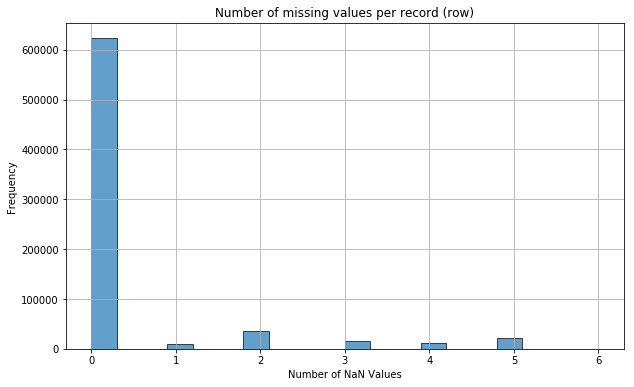

In [25]:
# If there are other re-engineering tasks you need to perform, make sure you
# take care of them here. (Dealing with missing data will come in step 2.1.)

print("\nNumber of null values in the preprocessed data set (azdias_re_encoded)")
null_values_per_row_azdias_re_encoded = azdias_re_encoded.isnull().sum(axis=1)
plot_null_values_per_row(null_values_per_row_azdias_re_encoded)

In [26]:
# Do whatever you need to in order to ensure that the dataframe only contains
# the columns that should be passed to the algorithm functions.

display(azdias_re_encoded.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720093 entries, 1 to 891220
Columns: 137 entries, ALTERSKATEGORIE_GROB to CAMEO_INTL_2015_LIFESTAGE
dtypes: float64(53), int64(25), object(2), uint8(57)
memory usage: 484.1+ MB


None

### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [27]:
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    
    # Put in code here to execute all main cleaning steps:
    # convert missing value codes into NaNs, ...
    # call above function 'unify_null_values(attrib_name, df)'
    for col_name, col_data in df.iteritems():
        unify_null_values(col_name, df)
    
    # remove selected columns and rows, ...
    # to remove columns call above function 'check_and_drop_column(df, column_name_list)'
    columns_to_remove = ['AGER_TYP','KK_KUNDENTYP', 'GEBURTSJAHR', 'ALTER_HH']
    check_and_drop_column(df, columns_to_remove)

    # to exclude rows based on the number of NaN values call 
    null_values_per_row = df.isnull().sum(axis=1)  # count null values per row
    # ... and split data frame based on configured a threshold
    threshold = 5 # number of missing values
    df_sub_1 = df[null_values_per_row <= threshold]
    df_sub_2 = df[null_values_per_row > threshold]
                
    # select, re-encode, and engineer column values.
    # categorials:
    columns_to_encode = ['OST_WEST_KZ', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015']
    df_re_encoded = pd.get_dummies(df_sub_1, columns=columns_to_encode, prefix=columns_to_encode)
        
    # mixed:
    # use above functions 'extract_generation(data)' amd 'extract_movement(data)' 
    # ... and apply to column 'PRAEGENDE_JUGENDJAHRE':
    df_re_encoded['GENERATION_BY_DECADE'] = df_re_encoded['PRAEGENDE_JUGENDJAHRE'].apply(extract_generation)
    df_re_encoded['MOVEMENT'] = df_re_encoded['PRAEGENDE_JUGENDJAHRE'].apply(extract_movement)
    # drop original column
    df_re_encoded.drop(columns='PRAEGENDE_JUGENDJAHRE', inplace=True)
    
    # use above functions 'extract_wealth_status(data)' and 'extract_live_stage_typlology(data)'
    # ... and appy to column 'CAMEO_INTL_2015'
    df_re_encoded['CAMEO_INTL_2015_WEALTH_STATUS'] = df_re_encoded['CAMEO_INTL_2015'].apply(extract_wealth_status)
    df_re_encoded['CAMEO_INTL_2015_LIFESTAGE'] = df_re_encoded['CAMEO_INTL_2015'].apply(extract_live_stage_typlology)
    # drop original column 
    df_re_encoded.drop(columns='CAMEO_INTL_2015', inplace=True)
    
    # Return the cleaned dataframe.
    return df_re_encoded

## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](https://scikit-learn.org/0.16/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [28]:
null_value_count_azdias_re_encoded = count_null_values(azdias_re_encoded)


null value count per column of azidas:
ALTERSKATEGORIE_GROB                 0
ANREDE_KZ                            0
CJT_GESAMTTYP                        0
FINANZ_MINIMALIST                    0
FINANZ_SPARER                        0
FINANZ_VORSORGER                     0
FINANZ_ANLEGER                       0
FINANZ_UNAUFFAELLIGER                0
FINANZ_HAUSBAUER                     0
FINANZTYP                            0
GFK_URLAUBERTYP                      0
GREEN_AVANTGARDE                     0
HEALTH_TYP                       15270
LP_LEBENSPHASE_FEIN              20084
LP_LEBENSPHASE_GROB              19935
LP_FAMILIE_FEIN                  19576
LP_FAMILIE_GROB                  19576
LP_STATUS_FEIN                       0
LP_STATUS_GROB                       0
NATIONALITAET_KZ                 13287
RETOURTYP_BK_S                       0
SEMIO_SOZ                            0
SEMIO_FAM                            0
SEMIO_REL                            0
SEMIO_MAT               

In [29]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.

from sklearn.preprocessing import Imputer

#imputer = Imputer(strategy='most_frequent')
imputer = Imputer(strategy='median')
azdias_imputed = pd.DataFrame(imputer.fit_transform(azdias_re_encoded), columns=azdias_re_encoded.columns)
null_value_count_azdias_imputed = count_null_values(azdias_imputed)


null value count per column of azidas:
ALTERSKATEGORIE_GROB             0
ANREDE_KZ                        0
CJT_GESAMTTYP                    0
FINANZ_MINIMALIST                0
FINANZ_SPARER                    0
FINANZ_VORSORGER                 0
FINANZ_ANLEGER                   0
FINANZ_UNAUFFAELLIGER            0
FINANZ_HAUSBAUER                 0
FINANZTYP                        0
GFK_URLAUBERTYP                  0
GREEN_AVANTGARDE                 0
HEALTH_TYP                       0
LP_LEBENSPHASE_FEIN              0
LP_LEBENSPHASE_GROB              0
LP_FAMILIE_FEIN                  0
LP_FAMILIE_GROB                  0
LP_STATUS_FEIN                   0
LP_STATUS_GROB                   0
NATIONALITAET_KZ                 0
RETOURTYP_BK_S                   0
SEMIO_SOZ                        0
SEMIO_FAM                        0
SEMIO_REL                        0
SEMIO_MAT                        0
SEMIO_VERT                       0
SEMIO_LUST                       0
SEMIO_ERL      

In [30]:
#gather info
azdias_imputed_int = azdias_imputed.astype(int)
display(azdias_imputed_int.head(10))

ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  FINANZ_MINIMALIST  FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  FINANZ_UNAUFFAELLIGER  FINANZ_HAUSBAUER  FINANZTYP  GFK_URLAUBERTYP  GREEN_AVANTGARDE  HEALTH_TYP  LP_LEBENSPHASE_FEIN  LP_LEBENSPHASE_GROB  LP_FAMILIE_FEIN  LP_FAMILIE_GROB  LP_STATUS_FEIN  LP_STATUS_GROB  NATIONALITAET_KZ  RETOURTYP_BK_S  SEMIO_SOZ  SEMIO_FAM  SEMIO_REL  SEMIO_MAT  SEMIO_VERT  SEMIO_LUST  SEMIO_ERL  SEMIO_KULT  SEMIO_RAT  SEMIO_KRIT  SEMIO_DOM  SEMIO_KAEM  SEMIO_PFLICHT  SEMIO_TRADV  SHOPPER_TYP  SOHO_KZ  TITEL_KZ  VERS_TYP  ZABEOTYP  ANZ_PERSONEN  ANZ_TITEL  HH_EINKOMMEN_SCORE  W_KEIT_KIND_HH  WOHNDAUER_2008  ANZ_HAUSHALTE_AKTIV  ANZ_HH_TITEL  GEBAEUDETYP  KONSUMNAEHE  MIN_GEBAEUDEJAHR  WOHNLAGE  KBA05_ANTG1  KBA05_ANTG2  KBA05_ANTG3  KBA05_ANTG4  KBA05_BAUMAX  KBA05_GBZ  BALLRAUM  EWDICHTE  INNENSTADT  GEBAEUDETYP_RASTER  KKK  MOBI_REGIO  ONLINE_AFFINITAET  REGIOTYP  KBA13_ANZAHL_PKW  PLZ8_ANTG1  PLZ8_ANTG2  PLZ8_ANTG3  PLZ8_ANTG4  PLZ8_BAUMAX  PLZ8_HHZ  PLZ8_GBZ  ARBEIT  ORTSGR_KLS9  RELAT_AB  OST_WEST_KZ_O  OST_WEST_KZ_W  CAMEO_DEUG_2015_1  CAMEO_DEUG_2015_2  CAMEO_DEUG_2015_3  CAMEO_DEUG_2015_4  CAMEO_DEUG_2015_5  CAMEO_DEUG_2015_6  CAMEO_DEUG_2015_7  CAMEO_DEUG_2015_8  CAMEO_DEUG_2015_9  CAMEO_DEUG_2015_X  CAMEO_DEU_2015_1A  CAMEO_DEU_2015_1B  CAMEO_DEU_2015_1C  CAMEO_DEU_2015_1D  CAMEO_DEU_2015_1E  CAMEO_DEU_2015_2A  CAMEO_DEU_2015_2B  CAMEO_DEU_2015_2C  CAMEO_DEU_2015_2D  CAMEO_DEU_2015_3A  CAMEO_DEU_2015_3B  CAMEO_DEU_2015_3C  CAMEO_DEU_2015_3D  CAMEO_DEU_2015_4A  CAMEO_DEU_2015_4B  CAMEO_DEU_2015_4C  CAMEO_DEU_2015_4D  CAMEO_DEU_2015_4E  CAMEO_DEU_2015_5A  CAMEO_DEU_2015_5B  CAMEO_DEU_2015_5C  CAMEO_DEU_2015_5D  CAMEO_DEU_2015_5E  CAMEO_DEU_2015_5F  CAMEO_DEU_2015_6A  CAMEO_DEU_2015_6B  CAMEO_DEU_2015_6C  CAMEO_DEU_2015_6D  CAMEO_DEU_2015_6E  CAMEO_DEU_2015_6F  CAMEO_DEU_2015_7A  CAMEO_DEU_2015_7B  CAMEO_DEU_2015_7C  CAMEO_DEU_2015_7D  CAMEO_DEU_2015_7E  CAMEO_DEU_2015_8A  CAMEO_DEU_2015_8B  CAMEO_DEU_2015_8C  CAMEO_DEU_2015_8D  CAMEO_DEU_2015_9A  CAMEO_DEU_2015_9B  CAMEO_DEU_2015_9C  CAMEO_DEU_2015_9D  CAMEO_DEU_2015_9E  CAMEO_DEU_2015_XX  GENERATION_BY_DECADE  MOVEMENT  CAMEO_INTL_2015_WEALTH_STATUS  CAMEO_INTL_2015_LIFESTAGE
0                     1          2              5                  1              5                 2               5                      4                 5          1               10                 0           3                   21                    6                5                3               2               1                 1               1          5          4          4          3           1           2          2           3          6           4          7           4              7            6            3        1         0         2         5             2          0                   6               3               9                   11             0            8            1              1992         4            0            0            0            2             5          1         6         3           8                   3    2           1                  3         3               963           2           3           2           1            1         5         4       3            5         4              0              1                  0                  0                  0                  0                  0                  0                  0                  1                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0            

In [31]:
display(azdias_imputed.describe())

ALTERSKATEGORIE_GROB      ANREDE_KZ  CJT_GESAMTTYP  FINANZ_MINIMALIST  FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  FINANZ_UNAUFFAELLIGER  FINANZ_HAUSBAUER      FINANZTYP  GFK_URLAUBERTYP  GREEN_AVANTGARDE     HEALTH_TYP  LP_LEBENSPHASE_FEIN  LP_LEBENSPHASE_GROB  LP_FAMILIE_FEIN  LP_FAMILIE_GROB  LP_STATUS_FEIN  LP_STATUS_GROB  NATIONALITAET_KZ  RETOURTYP_BK_S      SEMIO_SOZ      SEMIO_FAM      SEMIO_REL      SEMIO_MAT     SEMIO_VERT     SEMIO_LUST      SEMIO_ERL     SEMIO_KULT      SEMIO_RAT     SEMIO_KRIT      SEMIO_DOM     SEMIO_KAEM  SEMIO_PFLICHT    SEMIO_TRADV    SHOPPER_TYP        SOHO_KZ       TITEL_KZ       VERS_TYP       ZABEOTYP   ANZ_PERSONEN      ANZ_TITEL  HH_EINKOMMEN_SCORE  W_KEIT_KIND_HH  WOHNDAUER_2008  ANZ_HAUSHALTE_AKTIV   ANZ_HH_TITEL    GEBAEUDETYP    KONSUMNAEHE  MIN_GEBAEUDEJAHR       WOHNLAGE    KBA05_ANTG1    KBA05_ANTG2    KBA05_ANTG3    KBA05_ANTG4   KBA05_BAUMAX      KBA05_GBZ       BALLRAUM       EWDICHTE    INNENSTADT  GEBAEUDETYP_RASTER            KKK     MOBI_REGIO  ONLINE_AFFINITAET       REGIOTYP  KBA13_ANZAHL_PKW     PLZ8_ANTG1     PLZ8_ANTG2     PLZ8_ANTG3     PLZ8_ANTG4    PLZ8_BAUMAX       PLZ8_HHZ       PLZ8_GBZ         ARBEIT    ORTSGR_KLS9       RELAT_AB  OST_WEST_KZ_O  OST_WEST_KZ_W  CAMEO_DEUG_2015_1  CAMEO_DEUG_2015_2  CAMEO_DEUG_2015_3  CAMEO_DEUG_2015_4  CAMEO_DEUG_2015_5  CAMEO_DEUG_2015_6  CAMEO_DEUG_2015_7  CAMEO_DEUG_2015_8  CAMEO_DEUG_2015_9  CAMEO_DEUG_2015_X  CAMEO_DEU_2015_1A  CAMEO_DEU_2015_1B  CAMEO_DEU_2015_1C  CAMEO_DEU_2015_1D  CAMEO_DEU_2015_1E  CAMEO_DEU_2015_2A  CAMEO_DEU_2015_2B  CAMEO_DEU_2015_2C  CAMEO_DEU_2015_2D  CAMEO_DEU_2015_3A  CAMEO_DEU_2015_3B  CAMEO_DEU_2015_3C  CAMEO_DEU_2015_3D  CAMEO_DEU_2015_4A  CAMEO_DEU_2015_4B  CAMEO_DEU_2015_4C  CAMEO_DEU_2015_4D  CAMEO_DEU_2015_4E  CAMEO_DEU_2015_5A  CAMEO_DEU_2015_5B  CAMEO_DEU_2015_5C  CAMEO_DEU_2015_5D  CAMEO_DEU_2015_5E  CAMEO_DEU_2015_5F  CAMEO_DEU_2015_6A  CAMEO_DEU_2015_6B  CAMEO_DEU_2015_6C  CAMEO_DEU_2015_6D  CAMEO_DEU_2015_6E  CAMEO_DEU_2015_6F  CAMEO_DEU_2015_7A  CAMEO_DEU_2015_7B  CAMEO_DEU_2015_7C  CAMEO_DEU_2015_7D  CAMEO_DEU_2015_7E  CAMEO_DEU_2015_8A  CAMEO_DEU_2015_8B  CAMEO_DEU_2015_8C  CAMEO_DEU_2015_8D  CAMEO_DEU_2015_9A  CAMEO_DEU_2015_9B  CAMEO_DEU_2015_9C  CAMEO_DEU_2015_9D  CAMEO_DEU_2015_9E  CAMEO_DEU_2015_XX  GENERATION_BY_DECADE       MOVEMENT  CAMEO_INTL_2015_WEALTH_STATUS  CAMEO_INTL_2015_LIFESTAGE
count         720093.000000  720093.000000  720093.000000      720093.000000  720093.000000     720093.000000   720093.000000          720093.000000     720093.000000  720093.000000    720093.000000     720093.000000  720093.000000        720093.000000        720093.000000    720093.000000    720093.000000   720093.000000   720093.000000     720093.000000   720093.000000  720093.000000  720093.000000  720093.000000  720093.000000  720093.000000  720093.000000  720093.000000  720093.000000  720093.000000  720093.000000  720093.000000  720093.000000  720093.000000  720093.000000  720093.000000  720093.000000  720093.000000  720093.000000  720093.000000  720093.000000  720093.000000       720093.000000   720093.000000   720093.000000        720093.000000  720093.000000  720093.000000  720093.000000     720093.000000  720093.000000  720093.000000  720093.000000  720093.000000  720093.000000  720093.000000  720093.000000  720093.000000  720093.000000  720093.00000       720093.000000  720093.000000  720093.000000      720093.000000  720093.000000     720093.000000  720093.000000  720093.000000  720093.000000  720093.000000  720093.000000  720093.000000  720093.000000  720093.000000  720093.000000  720093.000000  720093.000000  720093.000000      720093.000000      720093.000000      720093.000000      720093.000000      720093.000000      720093.000000      720093.000000      720093.000000      720093.000000      720093.000000      720093.000000      720093.000000      720093.000000      720093.000000      720093.000000      720093.000000       720093.00000      720093.000000      720093.0

In [32]:
azdias_imputed.shape

(720093, 137)

In [33]:
# Example StandardScaler:
from sklearn.preprocessing import StandardScaler
azdias_ss = StandardScaler().fit_transform(azdias_imputed)

### Discussion 2.1: Apply Feature Scaling

I decided to apply an Imputer with the strategy "most_frequent" on the remaining null values. 
There are two arguments to do this:
1. Most numeric attribute values containing null values are not to be understood in a mathematical sense but as representations of attribute specific statements, thus the strategies "means" and "median" would not work to gain a sensible replacement of a null value.
2. There are two attributes containing numerically meaningful values: "ANZ_HAUHALTE_AKTIV" and "KBA13_ANZAHL_PKW". It would make no sense to use the "median" strategy here, but "means" could be of interest.  "Means" might produce the more exact result, but I decided to stay with "most-frequent" for these to attributes as well, since the number of null values is not that high and the "most-frequent" values should be accurate enough in the given context. 
If I wanted to optimize this, Id temporarily remove the two colums from the original data frame (azdias_re_encoded) before applying the Imputer, impute the two data frames separately with different strategies ("most_frequent" and "means") and then re-add the two colum data frame to the main data frame.

### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [34]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def do_pca(n_components, data):
    '''
    Transforms data using PCA to create n_components, and provides back the results of the
    transformation.

    INPUT: n_components - int - the number of principal components to create
           data - the data you would like to transform

    OUTPUT: pca - the pca object created after fitting the data
            X_pca - the transformed X matrix with new number of components
    '''
    X = StandardScaler().fit_transform(data)
    pca = PCA(n_components)
    X_pca = pca.fit_transform(X)
    return pca, X_pca


def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
    
    

In [35]:
# Re-apply PCA to the data while selecting for number of components to retain.
pca, X_pca = do_pca(5, azdias_imputed)
print("finished reduced")

finished reduced


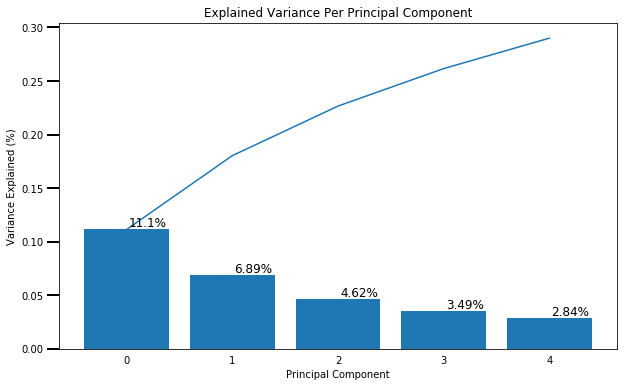

In [36]:
scree_plot(pca)

### Discussion 2.2: Perform Dimensionality Reduction - TODO

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding dimensionality reduction. How many principal components / transformed features are you retaining for the next step of the analysis?)

### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [37]:
def print_principal_component(data, pca, comp_num):
    comp_idx = comp_num-1
    column_names = data.columns
    first_component = pca.components_[comp_idx]
    first_variance_ratio = pca.explained_variance_ratio_[comp_idx]
    
    print(f"Principal Component {comp_num}: {first_variance_ratio:.4f}")
    
    column_ratios = [(col_name, first_component[i]) for i, col_name in enumerate(column_names)]
    positive_ratios = [item for item in column_ratios if item[1] >= 0]
    negative_ratios = [item for item in column_ratios if item[1] < 0]
    positive_ratios_sorted = sorted(positive_ratios, key=lambda x: x[1], reverse=True)
    negative_ratios_sorted = sorted(negative_ratios, key=lambda x: x[1], reverse=True)
    sorted_column_ratios = positive_ratios_sorted + negative_ratios_sorted

    for col_name, ratio in sorted_column_ratios:
        print(f" {col_name}: {ratio:.4f}")

In [38]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.

print_principal_component(azdias_imputed, pca, 1)

Principal Component 1: 0.1114
 PLZ8_ANTG3: 0.1911
 CAMEO_INTL_2015_WEALTH_STATUS: 0.1896
 PLZ8_ANTG4: 0.1859
 HH_EINKOMMEN_SCORE: 0.1851
 PLZ8_BAUMAX: 0.1821
 ORTSGR_KLS9: 0.1609
 EWDICHTE: 0.1585
 FINANZ_HAUSBAUER: 0.1509
 KBA05_ANTG4: 0.1344
 PLZ8_ANTG2: 0.1280
 ZABEOTYP: 0.1226
 KBA05_BAUMAX: 0.1206
 ARBEIT: 0.1203
 KBA05_ANTG3: 0.1197
 ANZ_HAUSHALTE_AKTIV: 0.1193
 CAMEO_DEUG_2015_9: 0.1142
 RELAT_AB: 0.1103
 CAMEO_DEUG_2015_8: 0.0957
 FINANZ_SPARER: 0.0926
 SEMIO_PFLICHT: 0.0638
 CAMEO_DEU_2015_8A: 0.0635
 GEBAEUDETYP: 0.0631
 SEMIO_REL: 0.0598
 REGIOTYP: 0.0597
 CAMEO_DEU_2015_9C: 0.0586
 CAMEO_DEU_2015_9B: 0.0583
 CAMEO_DEU_2015_9D: 0.0577
 W_KEIT_KIND_HH: 0.0563
 GENERATION_BY_DECADE: 0.0560
 GFK_URLAUBERTYP: 0.0549
 SEMIO_RAT: 0.0544
 OST_WEST_KZ_O: 0.0525
 SEMIO_MAT: 0.0501
 SEMIO_TRADV: 0.0483
 SEMIO_FAM: 0.0464
 CAMEO_DEU_2015_8B: 0.0441
 NATIONALITAET_KZ: 0.0436
 KKK: 0.0363
 CAMEO_DEU_2015_9A: 0.0362
 SEMIO_KULT: 0.0358
 SEMIO_KAEM: 0.0357
 CAMEO_DEU_2015_8C: 0.0352
 FINAN

In [39]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.

print_principal_component(azdias_imputed, pca, 2)

Principal Component 2: 0.0689
 ALTERSKATEGORIE_GROB: 0.2552
 FINANZ_VORSORGER: 0.2380
 SEMIO_ERL: 0.2260
 SEMIO_LUST: 0.1875
 RETOURTYP_BK_S: 0.1661
 W_KEIT_KIND_HH: 0.1184
 FINANZTYP: 0.1174
 FINANZ_MINIMALIST: 0.1070
 SEMIO_KRIT: 0.1045
 SHOPPER_TYP: 0.1007
 SEMIO_KAEM: 0.0864
 FINANZ_HAUSBAUER: 0.0801
 ANREDE_KZ: 0.0714
 WOHNDAUER_2008: 0.0648
 EWDICHTE: 0.0514
 ORTSGR_KLS9: 0.0504
 PLZ8_ANTG3: 0.0500
 SEMIO_DOM: 0.0492
 PLZ8_ANTG4: 0.0476
 PLZ8_BAUMAX: 0.0438
 KBA05_ANTG4: 0.0408
 ARBEIT: 0.0404
 CAMEO_DEU_2015_9E: 0.0388
 CAMEO_INTL_2015_WEALTH_STATUS: 0.0363
 RELAT_AB: 0.0362
 CAMEO_DEU_2015_8D: 0.0358
 ANZ_HAUSHALTE_AKTIV: 0.0354
 KBA05_BAUMAX: 0.0353
 PLZ8_ANTG2: 0.0331
 CAMEO_DEUG_2015_8: 0.0294
 CAMEO_INTL_2015_LIFESTAGE: 0.0276
 CAMEO_DEU_2015_6E: 0.0256
 ANZ_HH_TITEL: 0.0246
 VERS_TYP: 0.0225
 OST_WEST_KZ_O: 0.0224
 KBA05_ANTG3: 0.0185
 CAMEO_DEU_2015_8C: 0.0139
 HH_EINKOMMEN_SCORE: 0.0138
 CAMEO_DEUG_2015_6: 0.0138
 LP_STATUS_GROB: 0.0137
 CAMEO_DEU_2015_7E: 0.0126
 CAMEO_

In [40]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.

print_principal_component(azdias_imputed, pca, 3)


Principal Component 3: 0.0463
 SEMIO_VERT: 0.3399
 SEMIO_SOZ: 0.2610
 SEMIO_FAM: 0.2546
 SEMIO_KULT: 0.2384
 FINANZ_MINIMALIST: 0.1563
 FINANZTYP: 0.1120
 RETOURTYP_BK_S: 0.1043
 SEMIO_REL: 0.0912
 W_KEIT_KIND_HH: 0.0818
 FINANZ_VORSORGER: 0.0806
 SEMIO_MAT: 0.0628
 ALTERSKATEGORIE_GROB: 0.0588
 GREEN_AVANTGARDE: 0.0575
 MOVEMENT: 0.0575
 SEMIO_LUST: 0.0552
 PLZ8_BAUMAX: 0.0487
 LP_STATUS_GROB: 0.0470
 ORTSGR_KLS9: 0.0468
 EWDICHTE: 0.0452
 PLZ8_ANTG4: 0.0447
 PLZ8_ANTG3: 0.0424
 ARBEIT: 0.0345
 LP_STATUS_FEIN: 0.0323
 WOHNDAUER_2008: 0.0311
 RELAT_AB: 0.0282
 KBA05_BAUMAX: 0.0274
 PLZ8_ANTG2: 0.0256
 CAMEO_DEU_2015_9C: 0.0247
 KBA05_ANTG4: 0.0245
 CAMEO_DEUG_2015_9: 0.0227
 ANZ_HAUSHALTE_AKTIV: 0.0216
 OST_WEST_KZ_O: 0.0211
 CAMEO_INTL_2015_WEALTH_STATUS: 0.0208
 VERS_TYP: 0.0168
 CAMEO_DEU_2015_8B: 0.0149
 CAMEO_DEUG_2015_8: 0.0139
 ANZ_HH_TITEL: 0.0131
 TITEL_KZ: 0.0130
 CAMEO_DEU_2015_9B: 0.0130
 ANZ_TITEL: 0.0123
 CAMEO_DEUG_2015_1: 0.0116
 CAMEO_DEU_2015_5D: 0.0115
 CAMEO_DEU_201

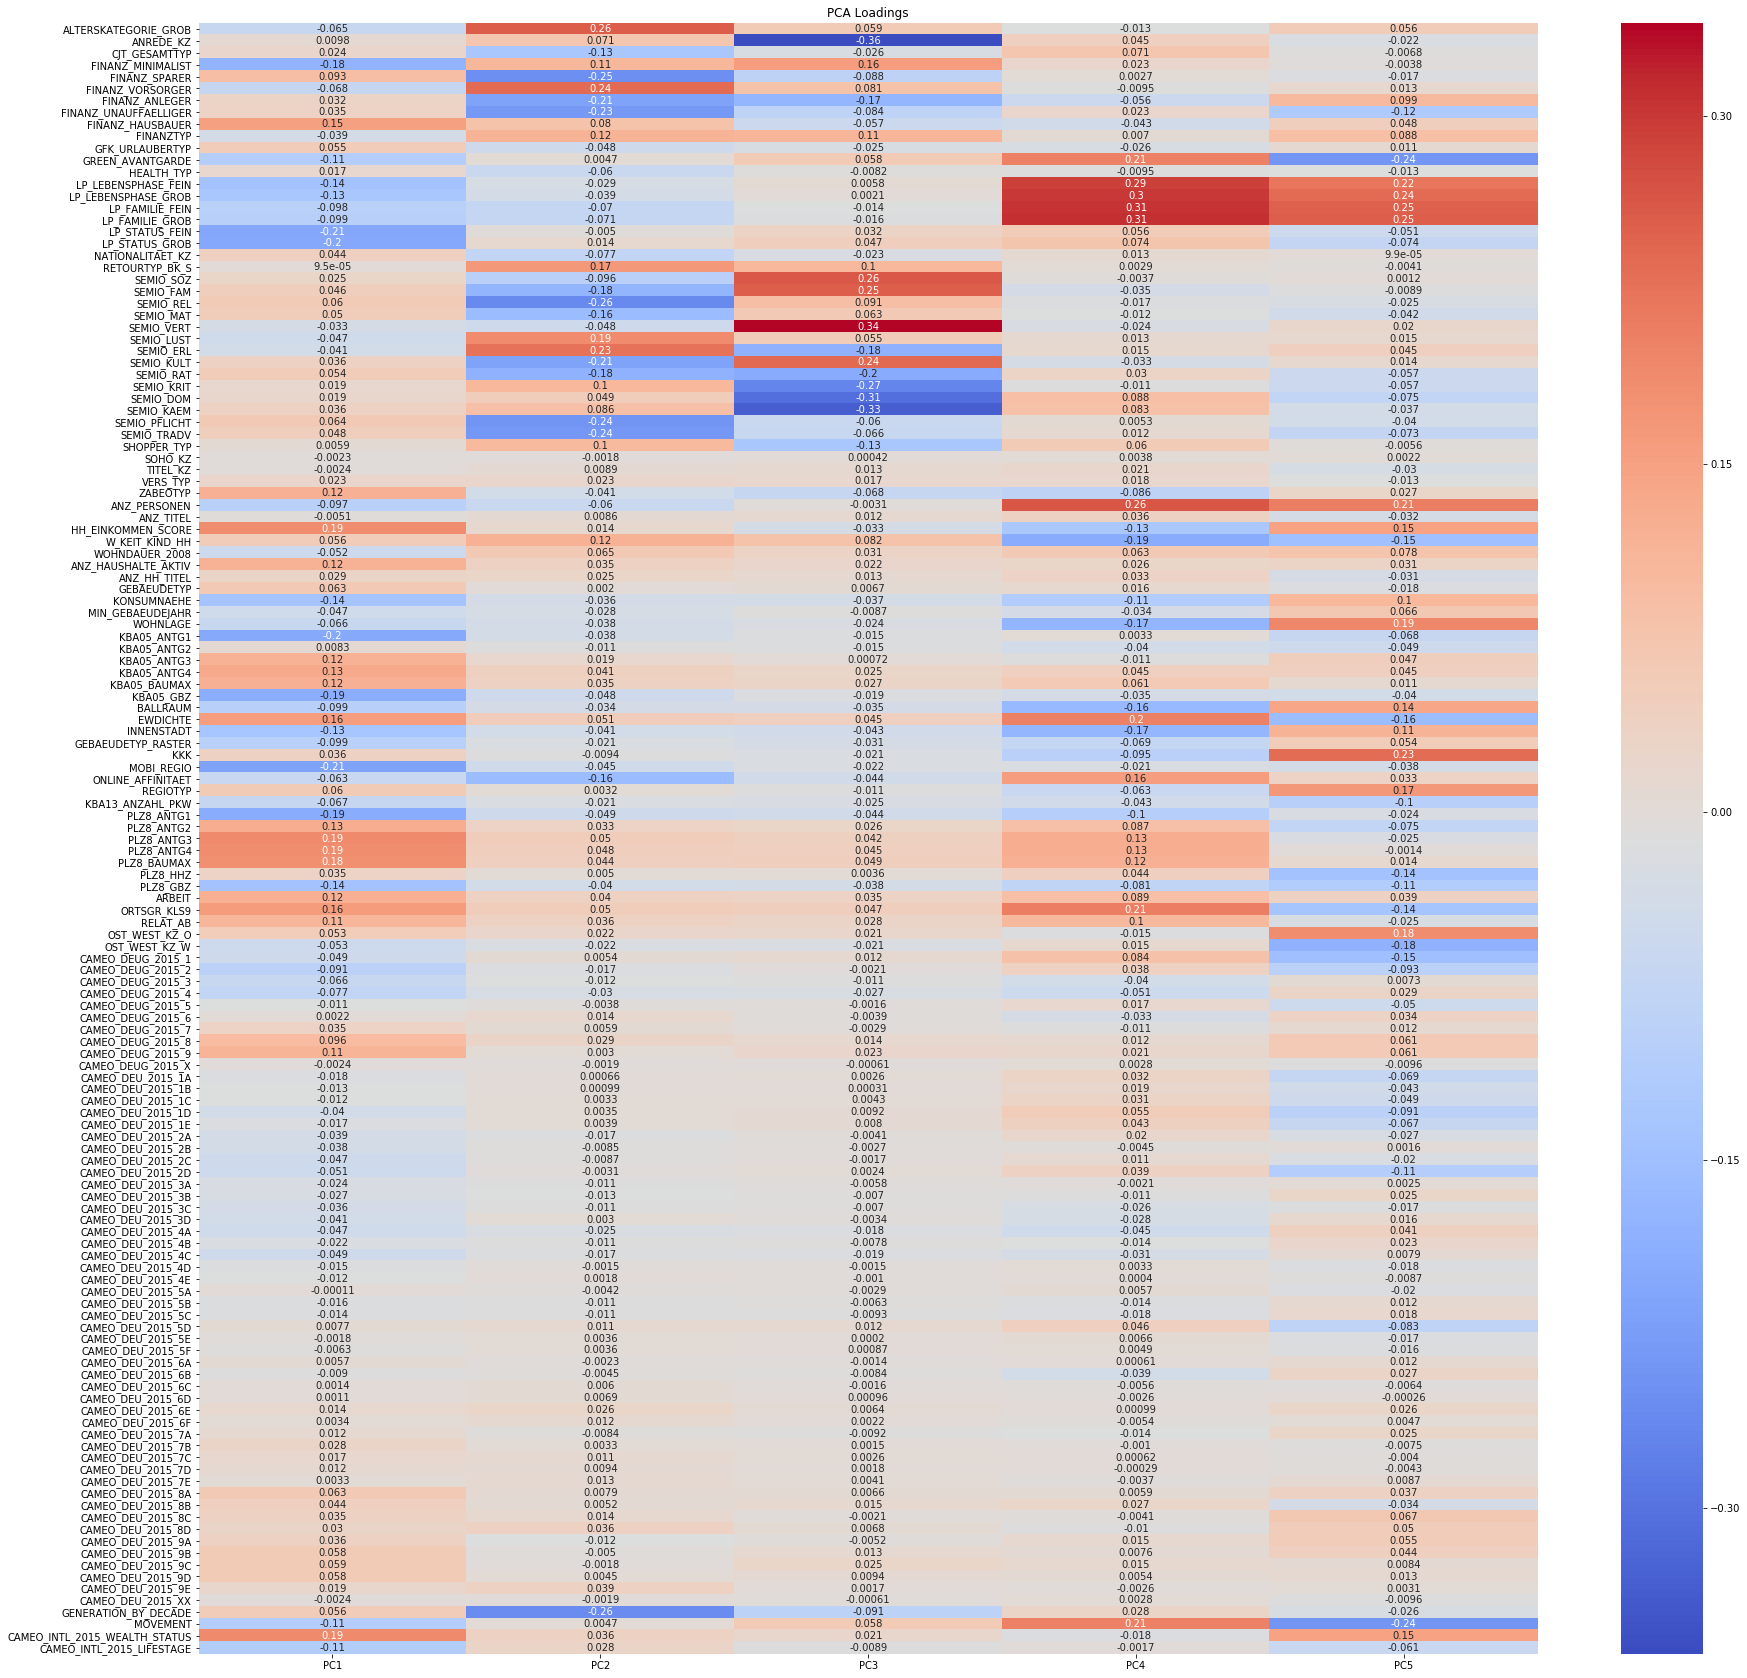

In [41]:
# plot a heatmap
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index=azdias_imputed.columns)

plt.figure(figsize=(30, 30))
sns.heatmap(loadings, annot=True, cmap='coolwarm')
plt.title('PCA Loadings')
plt.show()

### Discussion 2.3: Interpret Principal Components - TODO
Info collection:
- large (weight) values (either positive or negative) have more influence on a principal component!
(https://datagy.io/python-pca/)
- "By examining which variables have high loadings on which principal components, we can begin to understand the underlying structure of the data and find meaningful patterns."

Draft (see excel sheet):

Collection 1: focus on live stages, area of residency, social status and on financial typology

Collection 2: focus on age/generation, personality and financial type

Collection 3: focus on personality, financial type, age/generation

(Double-click this cell and replace this text with your own text, reporting your observations from detailed investigation of the first few principal components generated. Can we interpret positive and negative values from them in a meaningful way?)

## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

In [42]:
from sklearn.cluster import KMeans

In [43]:
#Compute the average difference from each point to its assigned cluster's center
def compute_average_distance_to_center(X_pca, kmeans):
    total_samples = X_pca.shape[0]
    total_inertia = -kmeans.score(X_pca)  # positive value of inertia
    average_difference = total_inertia / total_samples

    print(f"Total Inertia: {total_inertia:.4f}")
    print(f"Number of Samples: {total_samples}")
    print(f"Average Difference from Each Point to Its Cluster Center: {average_difference:.4f}")

In [44]:
# Over a number of different cluster counts...
def print_avg_diff_to_center(X_pca, cluster_range):
    for i in cluster_range:
        # run k-means clustering on the data and...
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(X_pca)

        # compute the average within-cluster distances.
        print(f"Number of Clusters in Demographic Data: {i}")
        compute_average_distance_to_center(X_pca, kmeans)
        print("---")

print_avg_diff_to_center(X_pca, range(1, 7))        

Number of Clusters in Demographic Data: 1
Total Inertia: 28606940.7128
Number of Samples: 720093
Average Difference from Each Point to Its Cluster Center: 39.7267
---
Number of Clusters in Demographic Data: 2
Total Inertia: 20222448.6834
Number of Samples: 720093
Average Difference from Each Point to Its Cluster Center: 28.0831
---
Number of Clusters in Demographic Data: 3
Total Inertia: 17004638.0634
Number of Samples: 720093
Average Difference from Each Point to Its Cluster Center: 23.6145
---
Number of Clusters in Demographic Data: 4
Total Inertia: 14927407.5773
Number of Samples: 720093
Average Difference from Each Point to Its Cluster Center: 20.7298
---
Number of Clusters in Demographic Data: 5
Total Inertia: 13559942.4925
Number of Samples: 720093
Average Difference from Each Point to Its Cluster Center: 18.8308
---
Number of Clusters in Demographic Data: 6
Total Inertia: 12401552.4063
Number of Samples: 720093
Average Difference from Each Point to Its Cluster Center: 17.2222
--

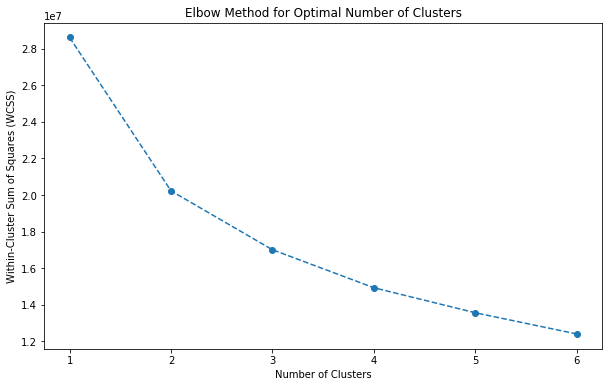

In [45]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.
def visualize_wcss(X_pca, cluster_range):
    wcss = []
    for i in cluster_range:
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(X_pca)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(cluster_range, wcss, marker='o', linestyle='--')
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
    plt.show()

visualize_wcss(X_pca, range(1, 7))

In [46]:
from mpl_toolkits.mplot3d import Axes3D

def print_scatter_plot(X_pca, cluster_range):
    colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k', 'w']
    
    for i in cluster_range:
        kmeans = KMeans(n_clusters=i, random_state=42)
        labels = kmeans.fit_predict(X_pca)
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        for j in np.unique(labels):
            # Select data points that belong to the j-th cluster
            cluster_points = X_pca[labels == j]
            # Plot the cluster points
            ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], 
                       c=colors[j % len(colors)], label=f'Cluster {j}', alpha=0.6, edgecolors='w', s=100)

        ax.set_xlabel('Principal Component 1')
        ax.set_ylabel('Principal Component 2')
        ax.set_zlabel('Principal Component 3')
        ax.set_title(f'PCA of Data Clusters with {i} Clusters')
        ax.legend()
        plt.show()

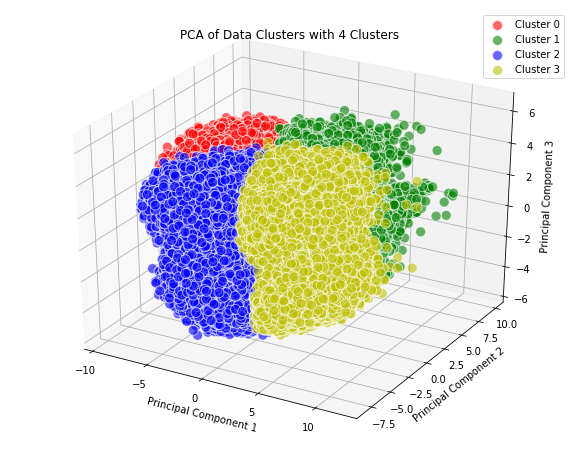

finished


In [47]:
print_scatter_plot(X_pca, range(4, 5))
print('finished')

In [48]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.

optimal_cluster = 4
kmeans_opt = KMeans(n_clusters=optimal_cluster, random_state=42)
labels = kmeans_opt.fit_predict(X_pca)
print("finished kmeans opt")

finished kmeans opt


### Discussion 3.1: Apply Clustering to General Population - TODO

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding clustering. Into how many clusters have you decided to segment the population?)

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [49]:
# Load in the customer demographics data.
customers = pd.read_csv("Udacity_CUSTOMERS_Subset.csv", sep=";")

In [51]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.

customers_cleaned = clean_data(customers)

4


In [52]:
# replace null values
#imputer = Imputer(strategy='most_frequent')
imputer = Imputer(strategy='median')
customers_imputed = pd.DataFrame(imputer.fit_transform(customers_cleaned), columns=customers_cleaned.columns)
null_value_count_customers_imputed = count_null_values(customers_imputed)


null value count per column of azidas:
ALTERSKATEGORIE_GROB             0
ANREDE_KZ                        0
CJT_GESAMTTYP                    0
FINANZ_MINIMALIST                0
FINANZ_SPARER                    0
FINANZ_VORSORGER                 0
FINANZ_ANLEGER                   0
FINANZ_UNAUFFAELLIGER            0
FINANZ_HAUSBAUER                 0
FINANZTYP                        0
GFK_URLAUBERTYP                  0
GREEN_AVANTGARDE                 0
HEALTH_TYP                       0
LP_LEBENSPHASE_FEIN              0
LP_LEBENSPHASE_GROB              0
LP_FAMILIE_FEIN                  0
LP_FAMILIE_GROB                  0
LP_STATUS_FEIN                   0
LP_STATUS_GROB                   0
NATIONALITAET_KZ                 0
RETOURTYP_BK_S                   0
SEMIO_SOZ                        0
SEMIO_FAM                        0
SEMIO_REL                        0
SEMIO_MAT                        0
SEMIO_VERT                       0
SEMIO_LUST                       0
SEMIO_ERL      

In [53]:
customers_imputed.shape

(129022, 137)

In [54]:
# apply pca to customer data
pca_customer, X_pca_customer = do_pca(5, customers_imputed)
print("finished")

finished


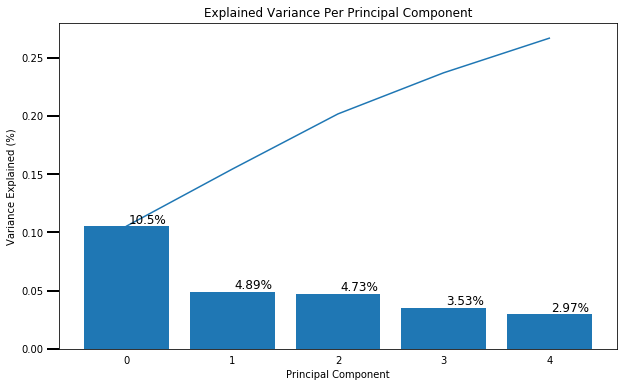

In [55]:
# visualize - compare with demographic data
scree_plot(pca_customer)

In [56]:
# check first three components - how do they correspond with the demographic data?
print_principal_component(customers_imputed, pca_customer, 1)

Principal Component 1: 0.1054
 FINANZ_HAUSBAUER: 0.1917
 HH_EINKOMMEN_SCORE: 0.1814
 PLZ8_BAUMAX: 0.1786
 CAMEO_INTL_2015_WEALTH_STATUS: 0.1781
 PLZ8_ANTG3: 0.1769
 PLZ8_ANTG4: 0.1691
 KBA05_ANTG4: 0.1475
 ORTSGR_KLS9: 0.1399
 EWDICHTE: 0.1390
 KBA05_ANTG3: 0.1374
 ZABEOTYP: 0.1336
 PLZ8_ANTG2: 0.1331
 ANZ_HAUSHALTE_AKTIV: 0.1225
 KBA05_BAUMAX: 0.1205
 ARBEIT: 0.1088
 RELAT_AB: 0.1069
 CAMEO_DEUG_2015_8: 0.1050
 SEMIO_KAEM: 0.1027
 SEMIO_KRIT: 0.0986
 ANREDE_KZ: 0.0968
 CAMEO_DEUG_2015_9: 0.0891
 W_KEIT_KIND_HH: 0.0857
 SEMIO_DOM: 0.0786
 GEBAEUDETYP: 0.0696
 SEMIO_ERL: 0.0671
 CAMEO_DEU_2015_8A: 0.0599
 OST_WEST_KZ_O: 0.0599
 REGIOTYP: 0.0576
 CAMEO_DEUG_2015_7: 0.0572
 CAMEO_DEU_2015_8B: 0.0542
 CAMEO_DEU_2015_9D: 0.0511
 CAMEO_DEU_2015_9E: 0.0485
 CAMEO_DEU_2015_8D: 0.0477
 ANZ_HH_TITEL: 0.0439
 CAMEO_DEU_2015_7B: 0.0425
 CAMEO_DEU_2015_6E: 0.0415
 CAMEO_DEUG_2015_6: 0.0408
 RETOURTYP_BK_S: 0.0395
 CAMEO_DEU_2015_8C: 0.0391
 CAMEO_DEU_2015_9C: 0.0366
 KBA05_ANTG2: 0.0346
 CAMEO_DEU_

In [57]:
print_principal_component(customers_imputed, pca_customer, 2)

Principal Component 2: 0.0489
 ANREDE_KZ: 0.2916
 SEMIO_KAEM: 0.2839
 SEMIO_ERL: 0.2392
 SEMIO_KRIT: 0.2389
 SEMIO_DOM: 0.2090
 FINANZ_ANLEGER: 0.1801
 WOHNLAGE: 0.1319
 INNENSTADT: 0.1262
 BALLRAUM: 0.1147
 KKK: 0.1075
 PLZ8_ANTG1: 0.1017
 KONSUMNAEHE: 0.0977
 SEMIO_RAT: 0.0956
 ZABEOTYP: 0.0852
 REGIOTYP: 0.0828
 GENERATION_BY_DECADE: 0.0762
 CAMEO_DEUG_2015_4: 0.0667
 VERS_TYP: 0.0644
 PLZ8_GBZ: 0.0644
 FINANZ_SPARER: 0.0618
 HEALTH_TYP: 0.0573
 MOBI_REGIO: 0.0565
 CAMEO_DEU_2015_4A: 0.0562
 HH_EINKOMMEN_SCORE: 0.0519
 GEBAEUDETYP_RASTER: 0.0490
 KBA05_GBZ: 0.0487
 SHOPPER_TYP: 0.0435
 MIN_GEBAEUDEJAHR: 0.0418
 CAMEO_DEUG_2015_3: 0.0365
 KBA05_ANTG1: 0.0364
 CAMEO_DEU_2015_4C: 0.0360
 KBA13_ANZAHL_PKW: 0.0326
 FINANZ_UNAUFFAELLIGER: 0.0315
 CAMEO_DEU_2015_3B: 0.0278
 CAMEO_DEU_2015_4B: 0.0236
 CAMEO_DEU_2015_2B: 0.0227
 CAMEO_DEU_2015_5C: 0.0191
 CAMEO_DEU_2015_2C: 0.0191
 CAMEO_DEU_2015_2A: 0.0189
 CAMEO_DEU_2015_5B: 0.0189
 SEMIO_PFLICHT: 0.0185
 CAMEO_DEU_2015_3C: 0.0181
 FINANZ_

In [58]:
print_principal_component(customers_imputed, pca_customer, 3)

Principal Component 3: 0.0474
 FINANZ_SPARER: 0.2911
 GENERATION_BY_DECADE: 0.2865
 FINANZ_ANLEGER: 0.2342
 SEMIO_PFLICHT: 0.2316
 SEMIO_REL: 0.2122
 SEMIO_TRADV: 0.2021
 SEMIO_RAT: 0.1970
 FINANZ_UNAUFFAELLIGER: 0.1853
 ONLINE_AFFINITAET: 0.1679
 HEALTH_TYP: 0.1593
 SEMIO_KULT: 0.1590
 CJT_GESAMTTYP: 0.1447
 SEMIO_FAM: 0.1247
 LP_FAMILIE_FEIN: 0.1172
 LP_FAMILIE_GROB: 0.1171
 ANZ_PERSONEN: 0.1061
 LP_LEBENSPHASE_GROB: 0.0887
 SEMIO_MAT: 0.0811
 LP_LEBENSPHASE_FEIN: 0.0738
 MIN_GEBAEUDEJAHR: 0.0648
 VERS_TYP: 0.0585
 SEMIO_SOZ: 0.0583
 NATIONALITAET_KZ: 0.0545
 WOHNLAGE: 0.0541
 OST_WEST_KZ_O: 0.0517
 HH_EINKOMMEN_SCORE: 0.0485
 PLZ8_BAUMAX: 0.0477
 SEMIO_DOM: 0.0438
 CAMEO_INTL_2015_WEALTH_STATUS: 0.0428
 FINANZTYP: 0.0366
 GFK_URLAUBERTYP: 0.0348
 KKK: 0.0342
 REGIOTYP: 0.0339
 ZABEOTYP: 0.0321
 KBA05_ANTG3: 0.0319
 CAMEO_DEU_2015_8B: 0.0303
 CAMEO_DEUG_2015_9: 0.0290
 CAMEO_DEU_2015_7A: 0.0287
 CAMEO_DEU_2015_9B: 0.0278
 PLZ8_ANTG4: 0.0272
 CAMEO_DEU_2015_9C: 0.0267
 CAMEO_DEUG_2015

In [59]:
#Compute the average difference from each point to its assigned cluster's center
print_avg_diff_to_center(X_pca_customer, range(1, 7))  

Number of Clusters in Demographic Data: 1
Total Inertia: 4714445.9100
Number of Samples: 129022
Average Difference from Each Point to Its Cluster Center: 36.5399
---
Number of Clusters in Demographic Data: 2
Total Inertia: 3309798.9333
Number of Samples: 129022
Average Difference from Each Point to Its Cluster Center: 25.6530
---
Number of Clusters in Demographic Data: 3
Total Inertia: 2799285.1080
Number of Samples: 129022
Average Difference from Each Point to Its Cluster Center: 21.6962
---
Number of Clusters in Demographic Data: 4
Total Inertia: 2470598.7447
Number of Samples: 129022
Average Difference from Each Point to Its Cluster Center: 19.1487
---
Number of Clusters in Demographic Data: 5
Total Inertia: 2230557.7153
Number of Samples: 129022
Average Difference from Each Point to Its Cluster Center: 17.2882
---
Number of Clusters in Demographic Data: 6
Total Inertia: 2010524.3266
Number of Samples: 129022
Average Difference from Each Point to Its Cluster Center: 15.5828
---


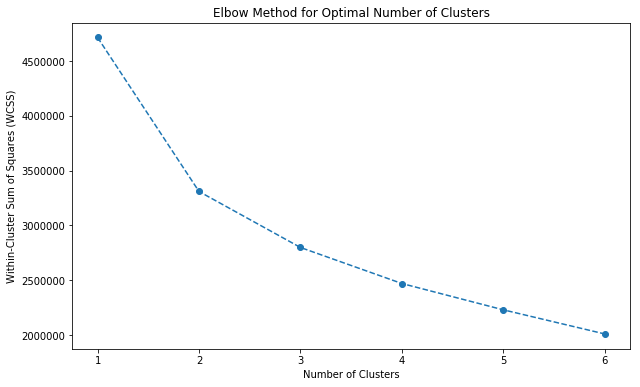

In [60]:
#Investigate wcss - compare to demographic data
visualize_wcss(X_pca_customer, range(1, 7))

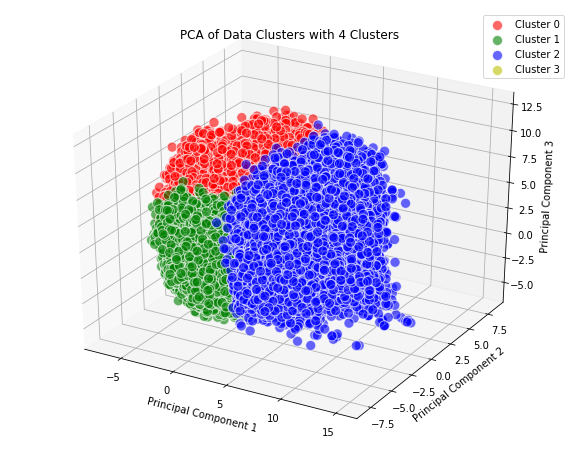

finished


In [61]:
print_scatter_plot(X_pca_customer, range(4, 5))
print('finished')

In [62]:
# refit to optimal cluster
optimal_cluster = 4
kmeans_opt_cust = KMeans(n_clusters=optimal_cluster, random_state=42)
labels_cust = kmeans_opt_cust.fit_predict(X_pca_customer)
print('finished kmeans_opt_cust')

finished kmeans_opt_cust


### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

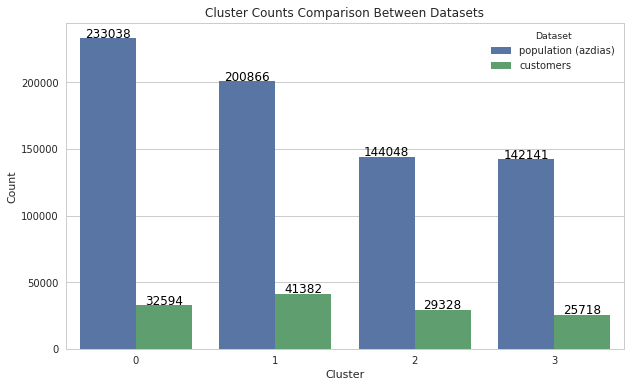

In [63]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.

# Create a DataFrame for each dataset
df_asdias = pd.DataFrame({'Data Point': range(len(labels)), 'Cluster': labels, 'Dataset': 'population (azdias)'})
df_customer = pd.DataFrame({'Data Point': range(len(labels_cust)), 'Cluster': labels_cust, 'Dataset': 'customers'})

#combine
df_combined = pd.concat([df_asdias, df_customer])

# Plot using seaborn countplot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.countplot(x='Cluster', hue='Dataset', data=df_combined)

# Add count annotations
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 1),
                textcoords='offset points')

plt.title('Cluster Counts Comparison Between Datasets')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

##### Info General Population Data Set

In [64]:
df_asdias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720093 entries, 0 to 720092
Data columns (total 3 columns):
Data Point    720093 non-null int64
Cluster       720093 non-null int32
Dataset       720093 non-null object
dtypes: int32(1), int64(1), object(1)
memory usage: 13.7+ MB


##### Info Customer Data Set

In [65]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129022 entries, 0 to 129021
Data columns (total 3 columns):
Data Point    129022 non-null int64
Cluster       129022 non-null int32
Dataset       129022 non-null object
dtypes: int32(1), int64(1), object(1)
memory usage: 2.5+ MB


The number of entries in the Customer Data Set is roughly a scarce fifth (18 %) of the number of entries of the General Population Data Set. In a perfect match of the clusters between the data sets, I would expect the customer bars in the diagram above to be roughly one fifth the heigt of the general population bars.

###### Cluster 1: - underrepresented:
The number of customer data points in this cluster is roughly 14 % of the number of the general population. 
=> This cluster of the general population is underrepresented in the customer data.

###### Cluster 2 - overrepresented: 
The number of customer data points in this cluster is roughly 29 % of the number of the general population.
=> This cluster of the general population is overrepresented in the customer data.

###### Cluster 3 - underrepresented: 
The number of customer data points in this cluster is roughly 15 % of the number of the general population.
=> This cluster of the general population is underrepresented in the customer data.

##### Cluster 4 -  match: 
The number of customer data points in this cluster is 18 % of the number of the general population.
=> This cluster of the customer data matches the general population proportionally.

The visualization below makes it easier to see the differences in the distribution.
The red bars of cluster 3 are of the same height and show the match. The yellow bars shows the customer overrepresentation in cluster 2. The blue and green bars show the customer underrepresetations in clusters 1 and 3. 

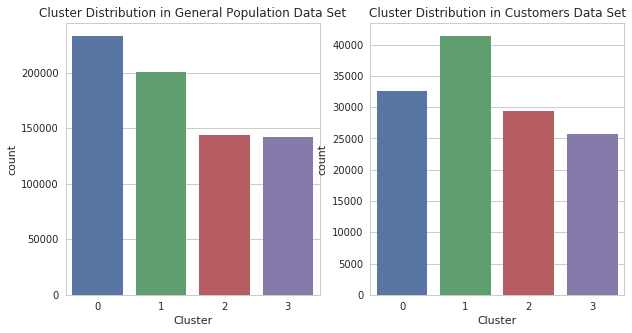

In [66]:
azdias_imputed['Cluster'] = labels
customers_imputed['Cluster'] = labels_cust 

# visualize cluster distribution
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Cluster', data=azdias_imputed)
plt.title('Cluster Distribution in General Population Data Set')

plt.subplot(1, 2, 2)
sns.countplot(x='Cluster', data=customers_imputed)
plt.title('Cluster Distribution in Customers Data Set')

plt.show()

### 3.3.4 Analysis of the Cluster Content
I have chosen the highest weighted features out of the principal components and grouped them under four aspects: 
- financial features
- demographic features
- environmental features
- features describing the personality of the people (semio)

I used this data to compare the data in the identified clusters and to extract the cluster charactersitics below.

In [67]:

features_finance = ['HH_EINKOMMEN_SCORE','CAMEO_INTL_2015_WEALTH_STATUS','FINANZ_HAUSBAUER', 'FINANZ_ANLEGER', 'FINANZ_SPARER', 'FINANZ_VORSORGER', 'FINANZ_MINIMALIST', 'FINANZTYP'] 
features_demographic = ['GENERATION_BY_DECADE', 'ALTERSKATEGORIE_GROB','ANREDE_KZ', 'W_KEIT_KIND_HH']
features_environment = ['PLZ8_BAUMAX', 'PLZ8_ANTG3', 'PLZ8_ANTG4', 'EWDICHTE', 'ORTSGR_KLS9']
features_semio = ['SEMIO_KAEM', 'SEMIO_ERL', 'SEMIO_KRIT','SEMIO_DOM', 'SEMIO_PFLICHT', 'SEMIO_REL', 'SEMIO_TRADV']

In [68]:
def get_feature_heatmap_by_cluster(df, features, cluster_label):
    # Filter the DataFrame for the specified cluster
    cluster_data = df[df['Cluster'] == cluster_label]
    
    # Check if the cluster exists in the data
    if cluster_data.empty:
        print(f"No data found for cluster {cluster_label}")
        return
    
    # Loop through the features to generate heatmaps
    for feature in features:
        # Count occurrences of each value within the feature
        count_data = cluster_data[feature].value_counts().sort_index()

        # Reshape count_data into a DataFrame suitable for a heatmap
        count_data_df = pd.DataFrame(count_data).T  # Transpose to match heatmap format

        # Plot heatmap
        plt.figure(figsize=(10, 0.3))
        sns.heatmap(count_data_df, cmap='Blues', annot=True, fmt='d', yticklabels=False)
        plt.title(f'Value Count Heatmap for {feature} in Cluster {cluster_label}')
        plt.xlabel(f'{feature} Values')
        plt.ylabel('Count')
        plt.show()


In [69]:
def show_cluster_characteristics(df, cluster):
    get_feature_heatmap_by_cluster(df, features_finance, cluster) # finance related features
    get_feature_heatmap_by_cluster(df, features_demographic, cluster) # demographic features
    get_feature_heatmap_by_cluster(df, features_environment, cluster) # environmental features
    get_feature_heatmap_by_cluster(df, features_semio, cluster) # semio features

#### 3.3.4.1 Cluster 1 - Compare General Population and Customers

##### General Population

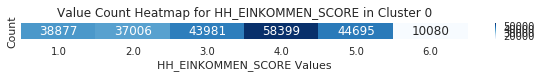

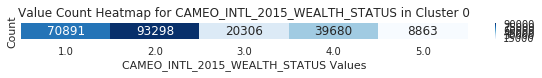

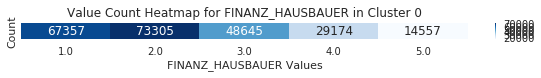

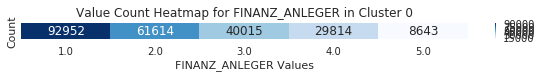

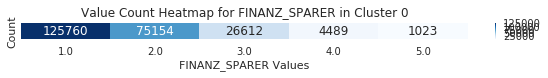

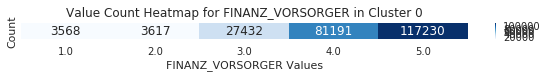

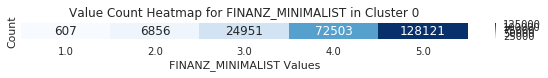

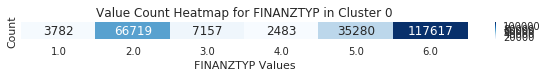

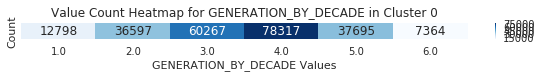

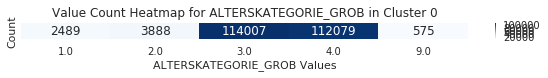

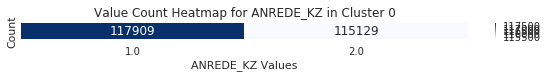

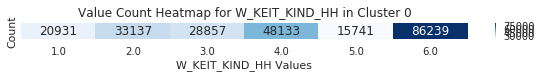

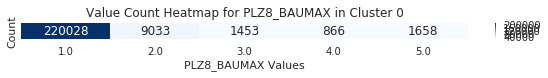

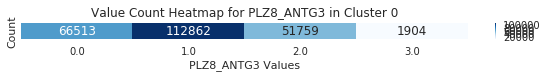

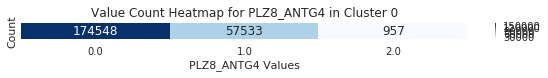

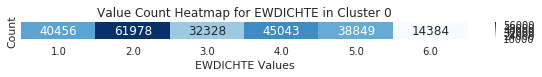

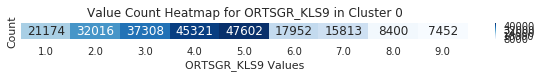

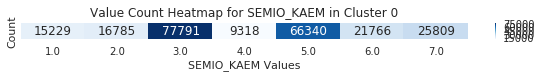

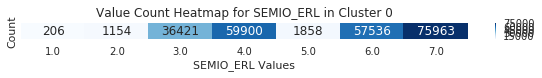

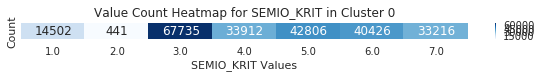

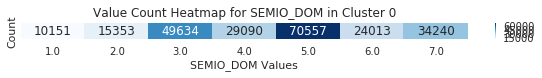

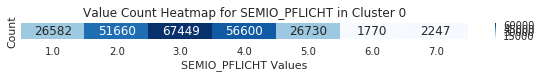

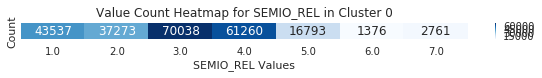

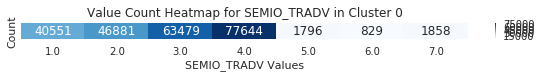

In [78]:
show_cluster_characteristics(azdias_imputed, 0) # cluster 1

##### Customers

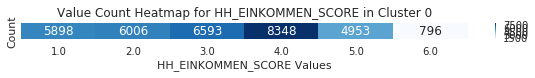

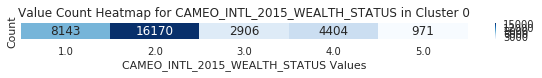

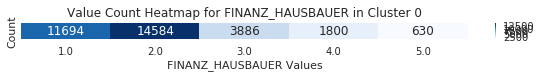

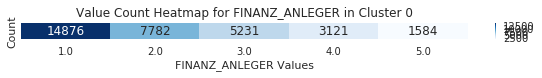

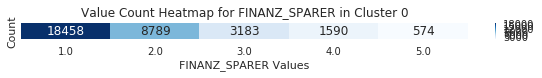

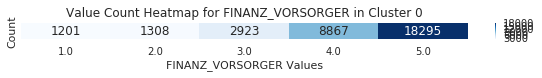

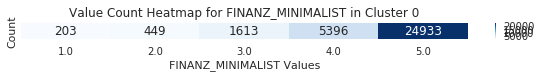

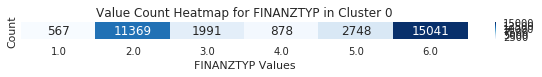

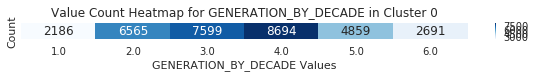

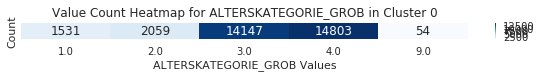

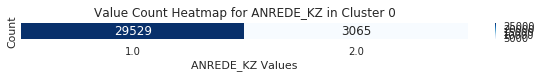

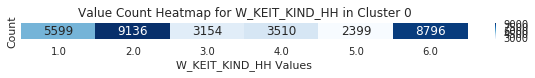

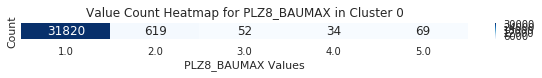

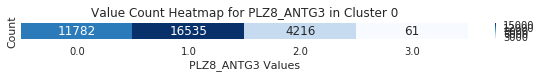

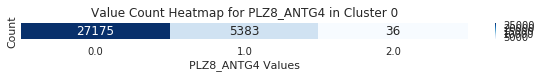

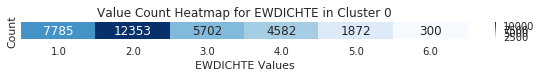

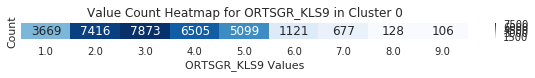

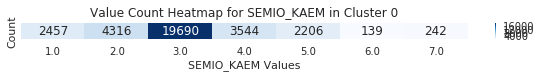

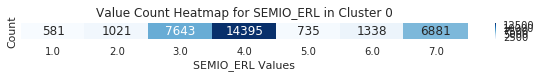

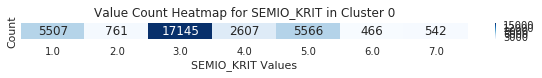

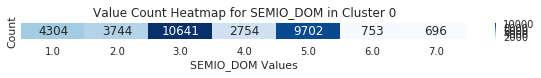

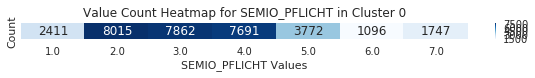

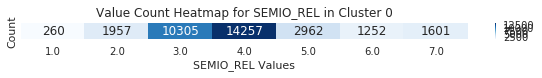

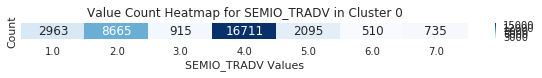

In [79]:
show_cluster_characteristics(customers_imputed, 0) # cluster 1

##### Analysis  -  General Population  is underrepresented by the Customer Data
###### Finance Features:
Both data sets show a rather similar picture.
- Household net income has a focus on an average income, but spreads over all income levels.
- Households are mostly considered prosperous
- People value home ownership, invest and save money
- There is not much emphasis on preparing financially for later in live
- They don't consider themselves financial minimalists 
- They are classified as inconspicous financial types with a trend to money saving

###### Demographic Features:
The data sets are rather similar with the exeption of the likelyhood of children in the household.
- People of this cluster are mainly older than 45 years
- The dominating movement of their youth was primarily minted in the 1970ies/80ies or earlier
- The number of male and female is rather balanced (slightly more male)
- The first significant difference between the datasets is in the likelyhood of children in the household. Whereas the likelyhood in the general population is very low to average, the customers have a significantly higher lightlyhood of children in the household.

###### Environmental Features: 
People in the customer data set tend to live in smaller communites than those in the general population data set.
- People live in small towns to smaller cities 
- The sizes of the communities differ sightly between customers and general population. Customers live more often in small towns, whereas the general population concentrates in larger towns.
- In their region are mainly 1 - 2 family homes
- There is a lower share of 6 - 10 family homes and only few 10+ family homes

###### Semio Features (Personality Typology)
There are no significant exeptions in this cluster, but the members of the customer data set seem to be a bit less conservative and more event-oriented.
- People of this cluster are critical-minded and dutiful
- Event orientation is on an average level, althoug customers tend to be a bit more event-oriented
- People have an average affinity to religion and traditional values, although the general population tends to be more conservative (religious and traditionally minded) than the customers.

##### Conclusion - Ideas to optimize
There are no huge differences between the people in the two data sets. The existing differences give hints for fine tuning  product and marketing strategies to gain a better coverage of this cluster, e. g.: 

1. Customers have a higher likelyhood of children in their households:
Here could be an opportunity to widen the product range, to make it more attractive for people living in households with no children. Maybe the marketing strategies could be adapted/enhanced. 

2. Customers are more event-oriented and less conservative as the general population in this cluster:
The marketing strategies could be enhanced to reach less event-oriented and more conservative people.

3. Customers live in smaller communities: 
The finding here could be, that mail-order business in this cluster is more attractive to people living in less urban areas.

#### 3.3.4.2 Cluster 2 - Compare General Population and Customers

#####  General Population

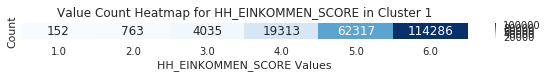

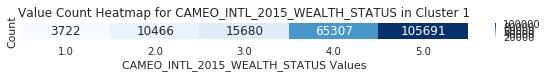

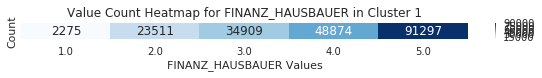

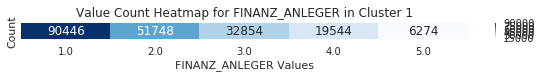

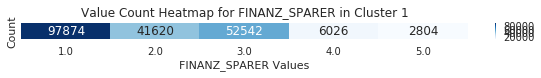

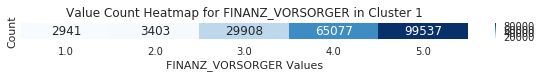

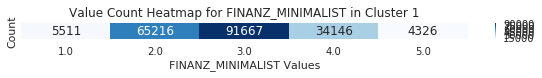

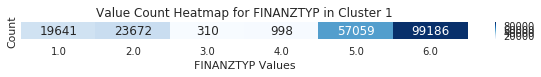

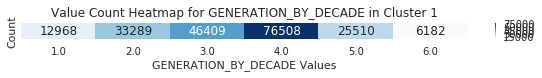

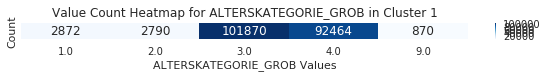

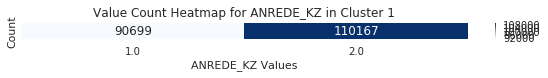

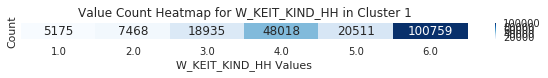

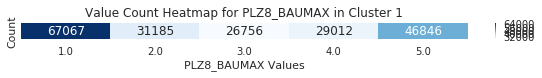

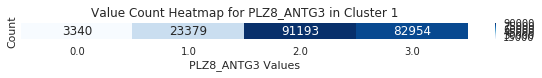

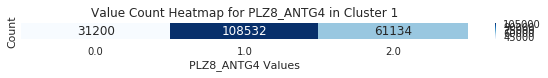

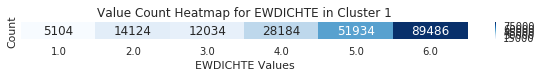

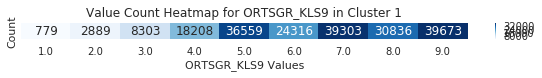

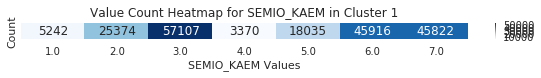

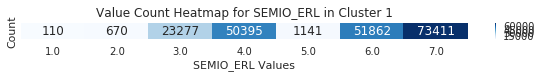

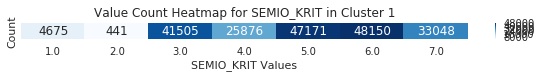

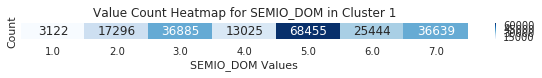

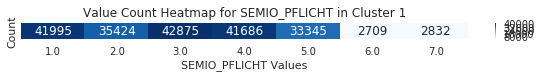

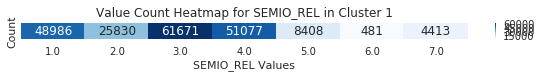

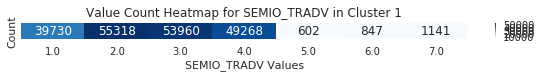

In [80]:
show_cluster_characteristics(azdias_imputed, 1) # cluster 2

#####  Customers

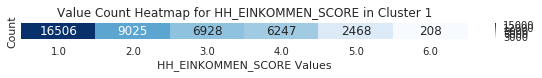

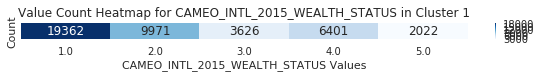

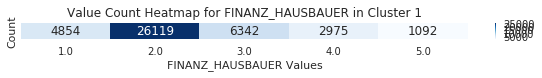

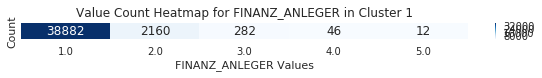

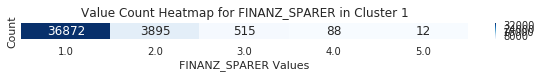

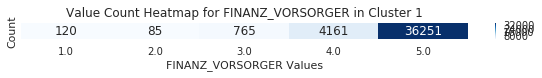

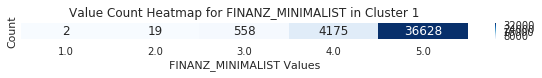

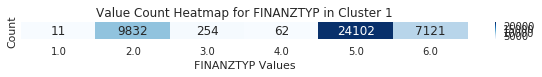

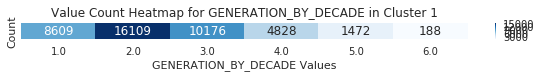

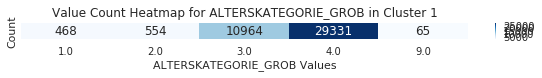

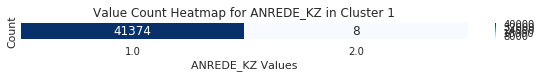

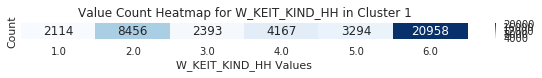

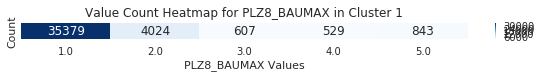

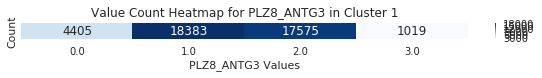

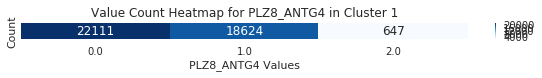

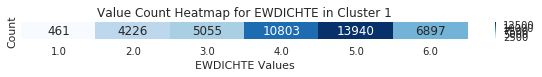

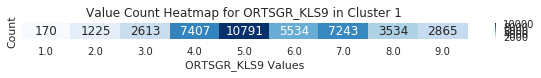

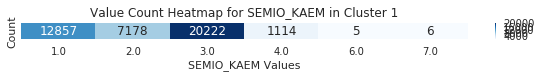

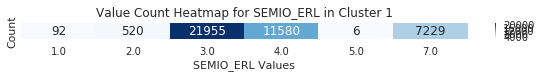

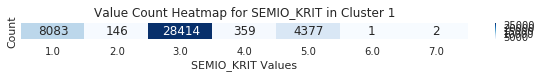

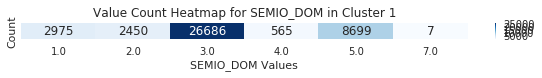

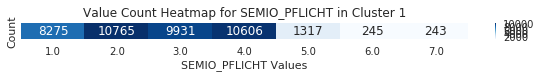

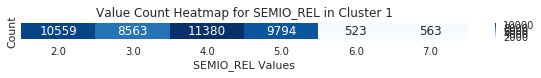

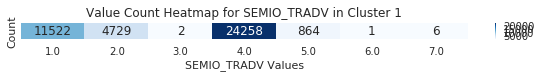

In [81]:
show_cluster_characteristics(customers_imputed, 1) # cluster 2

#####  Analysis  -  General Population  is overrepresented by the Customer Data
###### Finance Features:
In this cluster the financial features differ significantly between the two data sets. The customers of the mail-order company 
are in a better financial position than the general population.
- Household income presents a very differnt picture in the general population and customer data sets. The majority in the general population dataset has a low to average income, wheras the customer of the company have a very high to even highest income.
- A lot of the general population households are never the less considered prosporous but there are less affluent households as well. Most households of the customer data set are wealthy or prospous. This matches the data on houshold income
- The people value home ownership.
- Customers are keen investors and money-savers, which is quite contrary to the data for general population. 
- Customers in average are quite interested in their financial affairs, wheras the general populations tend to be financial minimalists.

###### Demographic Features:
Customers an general population differ also demographically. Customers are older than the general population and the likelyhood of children is very low. The clusters clearly contain different generations of people.
- The general population in this cluster ist young, mostly < 30 to 45 years, the dominating movement of their youth was primarily minted in the 1990ies. In contrast the customers are mainly 45 to > 60 years old, they made their marked experiences in the 1950ies, 60ies.
- The customer data in this cluster contain almost 100 % males, whereas the general population da is rather balanced with slightly more women.
- The probability of children in the houshold is very low for the customers, but average to high for the general population

###### Environmental Features: 
People in the customer data set tend to live in larger communites than those in the general population data set.
- People live in small towns to smaller cities 
- The sizes of the communities differ sightly between customers and general population. Customers tend to live in lager communites, whereas the general population lives in smaller towns an rural areas.
- In their region are mainly 1 - 2 family homes
- there is a lower share of 6 - 10 family homes and only few 10+ family homes

###### Semio Features (Personality Typology)
The differences in this feature group are not so vast as for example in the financial features, but it exists. Customers are more conservative, critical, dominant and dutiful, than the general population.
- Customers are descibed as critical- and dominant-minded, dutiful, having a combative attitute and are more conservative (religious, traditional-minded). 
- For the general population these features contain more average to low values.
- Both groups are event-oriented, the general population a bit less than the customers

##### Conclusion 
All differences mentioned above together form the picture, that the mail order company currently reaches only part of the general population in this cluster. Their focus is on the older generations. Wealty high income housholds with no kids and they seem to reach mostly men.

Viewing the total numbers, this part of the population seems to be a significant share of people in this cluster. The company targets this type of people very well, so well that they overrepresent the cluster compared to the general population.

The stategic question for the company is, whether they are happy with their current customer base in this cluster or whether they want expand their clientele towards female and younger people, who are not as affluent as the current clientele.

#### 3.3.4.3 Cluster 3 - Feature Overview

##### General Population

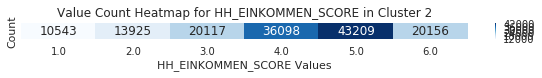

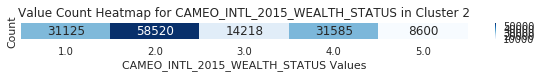

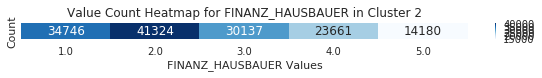

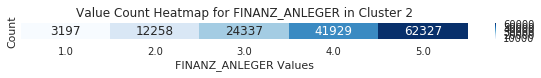

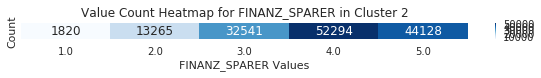

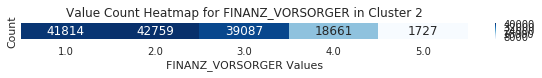

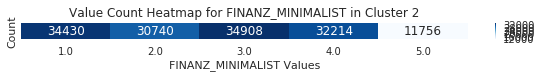

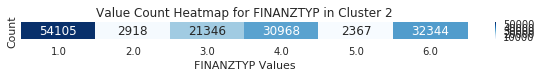

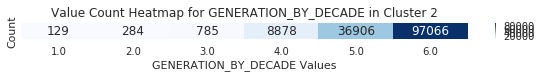

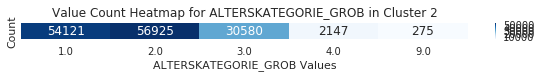

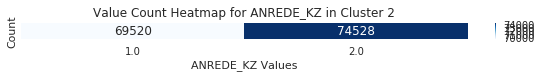

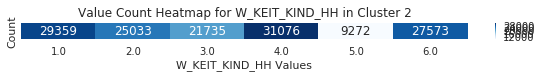

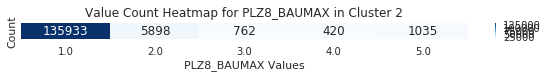

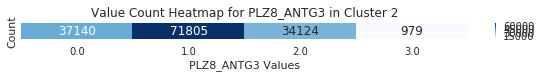

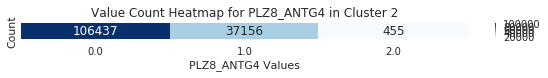

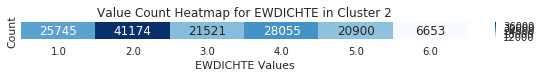

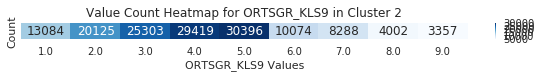

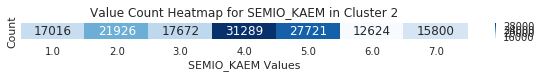

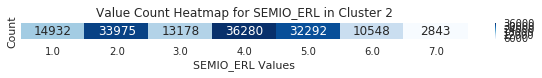

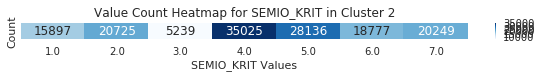

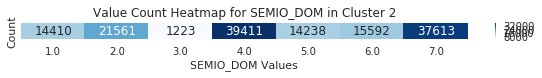

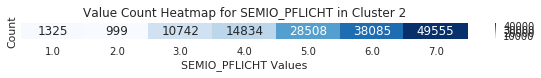

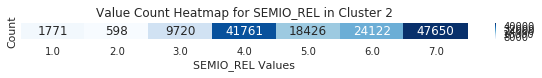

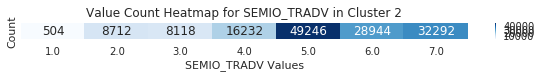

In [82]:
show_cluster_characteristics(azdias_imputed, 2) # cluster 3

##### Customers

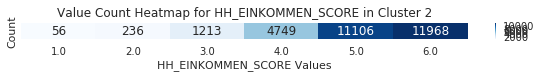

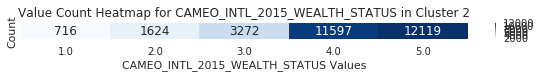

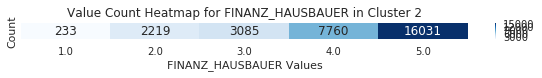

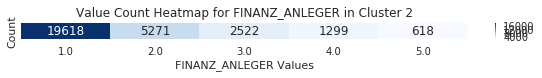

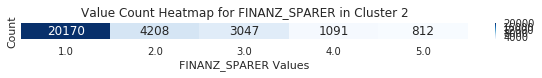

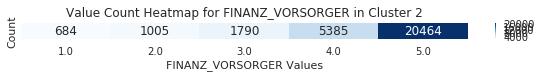

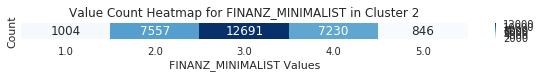

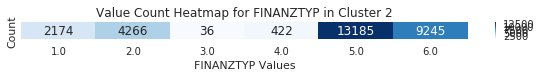

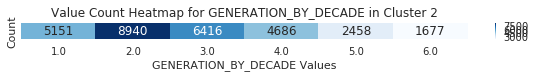

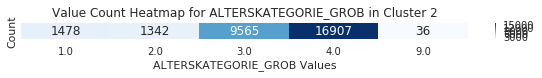

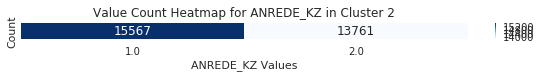

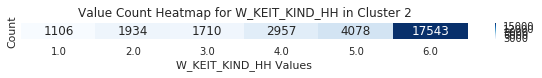

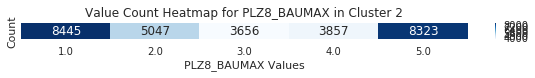

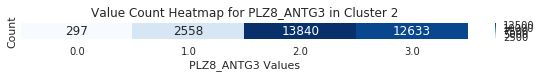

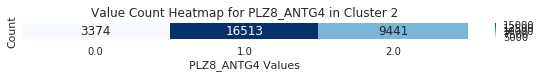

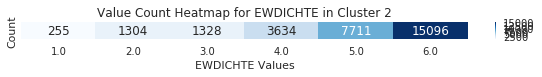

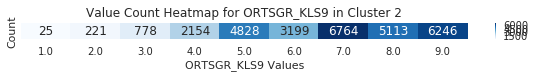

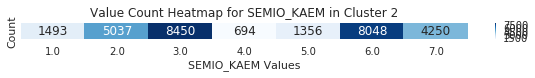

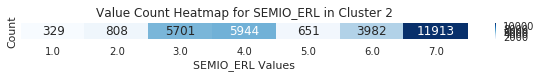

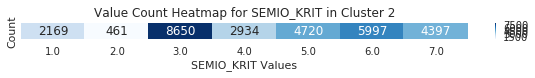

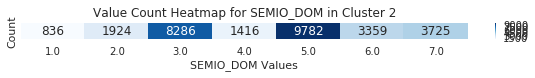

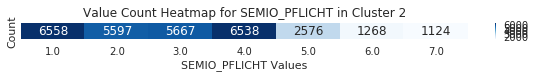

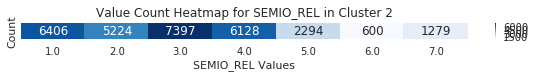

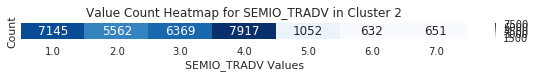

In [83]:
show_cluster_characteristics(customers_imputed, 2) # cluster 3


#### 3.3.4.4 Cluster 4 - - Feature Overview

#####  General Population

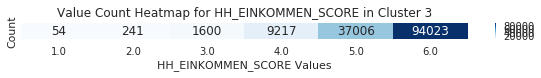

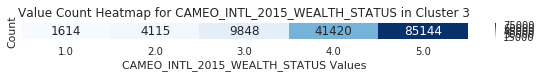

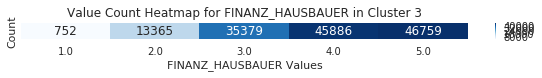

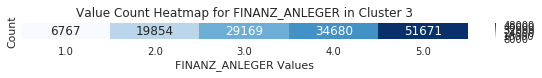

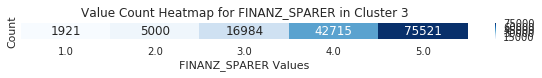

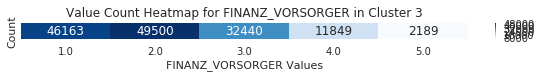

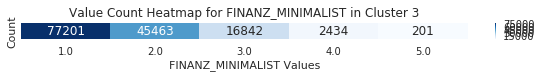

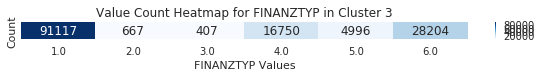

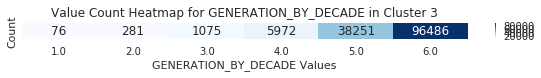

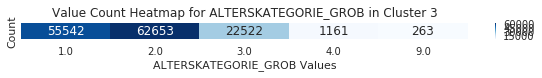

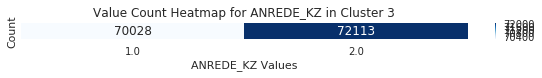

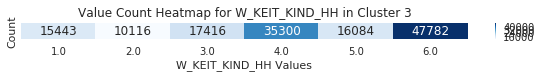

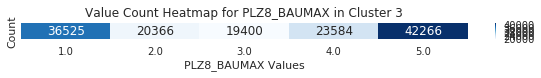

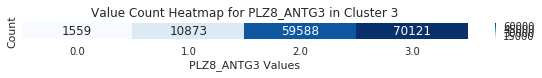

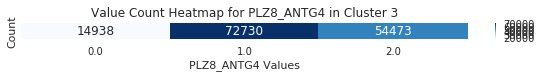

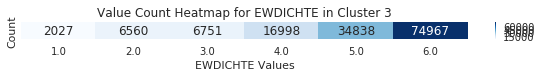

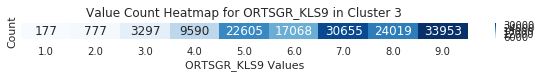

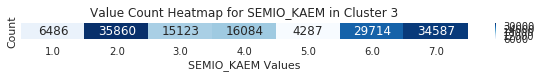

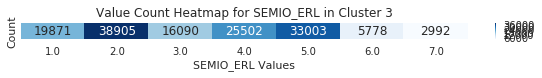

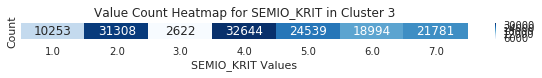

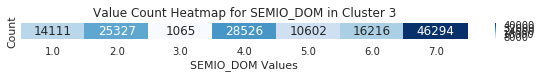

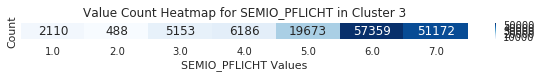

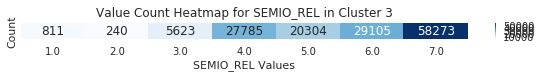

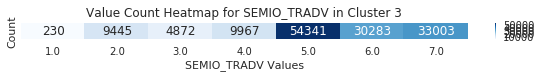

In [84]:
show_cluster_characteristics(azdias_imputed, 3) # cluster 4

#####  Customers

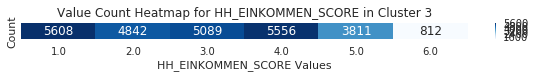

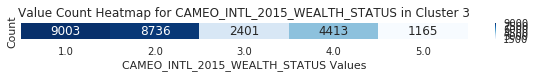

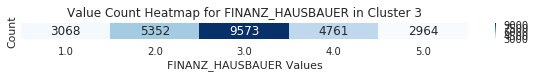

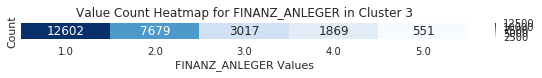

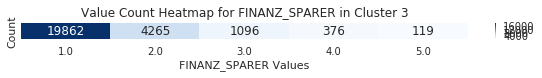

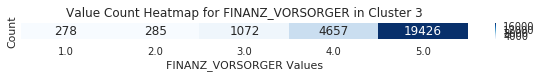

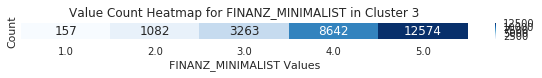

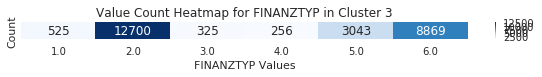

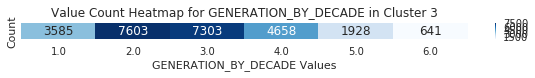

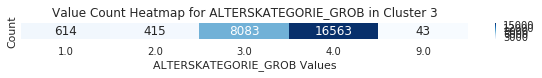

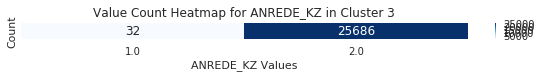

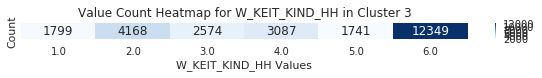

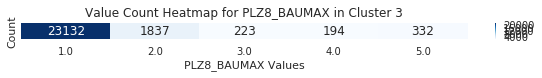

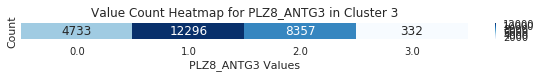

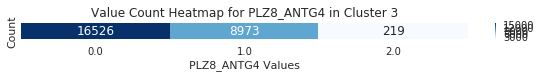

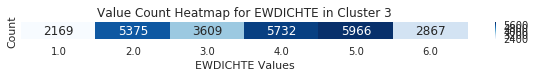

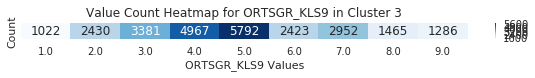

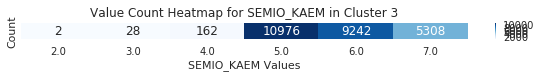

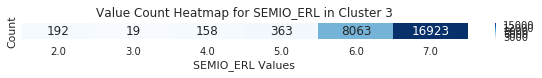

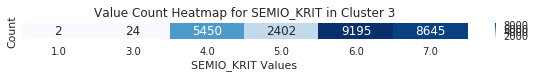

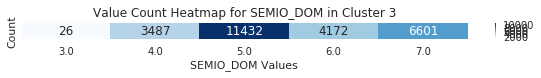

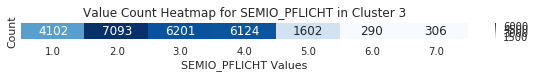

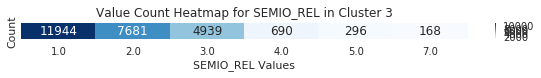

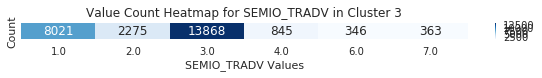

In [85]:
show_cluster_characteristics(customers_imputed, 3) # cluster 4

### Discussion 3.3: Compare Customer Data to Demographics Data   TODO

(Double-click this cell and replace this text with your own text, reporting findings and conclusions from the clustering analysis. Can we describe segments of the population that are relatively popular with the mail-order company, or relatively unpopular with the company?)

The customers of the company belong in general to the middle or older generations an live in prosporous households with an average to high income.


I included part of the discussion in the detailed analyses of Cluster 1 an Cluster 2 in the sections "3.3.4.1 Cluster 1 - Compare General Population and Customers" and "3.3.4.2 Cluster 2 - Compare General Population and Customers". 



> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.